In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, transform
import os
import open3d
import torch
import h5py
from io import StringIO
import matplotlib.patches as patches
from skimage.measure import regionprops
from skimage import filters
from numpy import linalg
import scipy

In [592]:
os.listdir('./'+'figs'+'/')[-1].split('.')[0]

'026'

In [588]:
str(int(os.listdir('./'+'figs'+'/')[-1]))

ValueError: invalid literal for int() with base 10: '026.pdf'

In [724]:
def getcen(el):
    centre = [linalg.det(el[:,[1,2,3]]), -linalg.det(el[:,[0,2,3]]), linalg.det(el[:,[0,1,3]])]/(-linalg.det(el[:,[0,1,2]]))
    return centre
def forwardproj(pcd, pr):
    pcd2 = np.concatenate((pcd, np.expand_dims(np.repeat(1, pcd.shape[0]), axis = 1)), axis=1)
    pcd2 = np.matmul(pcd2,pr.T)
    pcd2 = pcd2/np.repeat(np.expand_dims(pcd2[:,3], axis=1), 4, axis = 1)
    return(pcd2[:,:3])
def getcenf(el):
    centre = [linalg.det(el[:,[1,2,3]]), -linalg.det(el[:,[0,2,3]]), linalg.det(el[:,[0,1,3]]), -linalg.det(el[:,[0,1,2]])]
    return centre
def sf(fig, dirname):
    for i in ['.png', '.pdf']:
        fig.savefig('./'+dirname+'/'+str(int(os.listdir('./'+dirname+'/')[-1].split('.')[0])+1).zfill(3)+i)
#     fig.savefig('./'+dirname+'/'+str(int(os.listdir('./'+dirname+'/')[-1].split('.')[0])+1).zfill(3)+'.pdf')
#     return('./'+dirname+'/'+str(int(os.listdir('./'+dirname+'/')[-1].replace('.png',''))+1).zfill(3)+'.png')
def prmatread(path):
    with open(path, 'r') as f:
        prmatext = f.readlines()
    pr2 = [prmatext[i].replace('[','').replace(']','').replace(';','')\
           for i in range(len(prmatext))]
    pr3 = ''
    for i in pr2:
        pr3+=i
    pr4 = np.genfromtxt(StringIO(pr3), delimiter=',')
    return pr4
def outliers(ar):
    return(list(np.where(np.abs(ar-np.mean(ar)) > 6*np.std(ar))[0]))

In [10]:
bigm = np.zeros([5283,144,4])
i =0
for root, structure, files in os.walk('C:/cherepashkin1/phenoseed/598'):
    for file in files:
        if 'ProjectionMatrices' in file:
            bigm[i,:,:] = prmatread(os.path.join(root, file))
            i+=1
#             bigm[i,:,:] = print(file)

In [277]:
bigm2.shape

(5283, 36, 4, 4)

In [275]:
bigm4 = bigm.reshape(5283,144*4)

In [276]:
bigm4.shape

(5283, 576)

In [278]:
hf = h5py.File('bigm.h5', 'w')
hf.create_dataset('dataset', data=bigm2)
hf.close()

In [11]:
bigm.shape

(5283, 144, 4)

In [14]:
bigm[0,:3,3]

array([-1.8280709e+05, -9.9071000e+04, -1.2100000e+02])

In [16]:
basis = np.array([-np.matmul(linalg.inv(bigm[0,4*i:4*(i+1)-1,:3]), bigm[0,4*i:4*(i+1)-1,3]) for i in range(36)])

In [17]:
basis.shape

(36, 3)

In [26]:
deltas = np.zeros([bigm.shape[0], 36, 3])
for j in range(bigm.shape[0]):
    deltas[j,:,:] = np.array([-np.matmul(linalg.inv(bigm[j,4*i:4*(i+1)-1,:3]), bigm[j,4*i:4*(i+1)-1,3]) for i in range(36)])-basis  

In [27]:
bigm.shape[0]

5283

In [28]:
deltas.shape

(5283, 36, 3)

In [34]:
basis

array([[   99.8217522 ,    46.21209212, -2382.76923077],
       [ -334.76735776,    45.70332026, -2339.90362783],
       [ -753.25536961,    45.72662647, -2223.15389157],
       [-1146.03432265,    45.76467638, -2035.62239103],
       [-1500.96377099,    45.81634392, -1782.71363092],
       [-1806.83912462,    45.88001436, -1472.21212749],
       [-2054.28864504,    45.95377659, -1113.70342198],
       [-2236.0249015 ,    46.03540675,  -717.89255883],
       [-2346.64842251,    46.12237743,  -296.51572591],
       [-2382.76923077,    46.21209212,   139.15535411],
       [-2342.85483907,    46.30181093,   574.02949784],
       [-2228.0467263 ,    46.38878324,   995.81231472],
       [-2041.66527081,    46.90091444,  1391.56774775],
       [-1789.11846426,    46.72871419,  1749.33080753],
       [-1477.76286338,    46.55651554,  2058.18155103],
       [-1117.38766046,    46.72872263,  2308.16131324],
       [ -718.81274719,    46.90091816,  2491.68988914],
       [ -294.01397373,    47.0

In [50]:
deltas[2,:,:]

array([[-5.17834754e-02, -5.16619180e-01,  0.00000000e+00],
       [ 2.27476973e-01, -7.84991023e-03, -4.01103274e-02],
       [-1.01280958e-01,  1.41057971e-01,  3.68632524e-02],
       [-6.30695317e-02,  2.75203375e-01,  3.64132107e-02],
       [-1.73231276e-01,  2.23552262e-01,  1.45358302e-01],
       [-8.69128645e-02,  5.04294605e-01,  1.03578717e-01],
       [ 6.77412687e-03,  4.30515983e-01, -1.17331320e-02],
       [ 3.31986368e-02,  3.48896906e-01, -9.12125091e-02],
       [-1.11843134e-02,  4.34124889e-01,  6.34293939e-02],
       [ 0.00000000e+00,  5.16619180e-01, -1.39822677e-01],
       [-1.90468939e-02,  2.54700684e-01, -1.08020304e-01],
       [ 6.12447369e-03,  1.67722274e-01,  1.68268539e-02],
       [ 1.52156167e-02, -1.72206393e-01,  2.63542214e-02],
       [ 5.84020364e-03,  1.08002496e-12,  6.96008360e-03],
       [ 1.12914356e-01,  1.72206393e-01,  9.47463954e-02],
       [ 7.58097651e-02,  7.13953341e-11,  4.37687878e-02],
       [ 1.47483090e-01, -1.72206393e-01

In [40]:
deltas2 = deltas/basis

In [75]:
deltas3 = np.array([np.mean(deltas2[i,:,:],axis=0) for i in range(deltas.shape[0])])

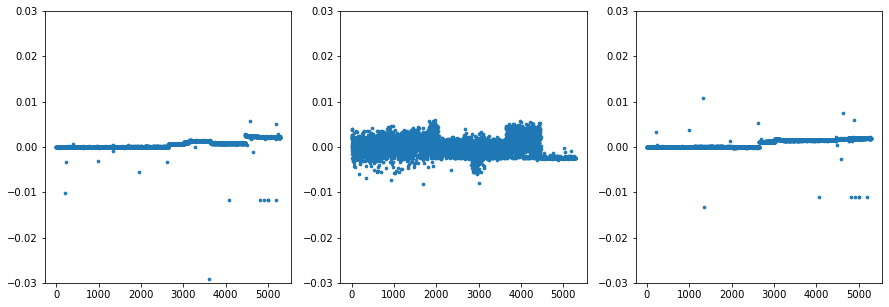

In [90]:
fig, (ax0,ax1,ax2) = plt.subplots(1,3, figsize=(15,5))
ax0.scatter(np.arange(deltas3.shape[0]),deltas3[:,0], s=7)
ax0.set_ylim(-0.03, 0.03)
ax1.scatter(np.arange(deltas3.shape[0]),deltas3[:,1], s=7)
ax1.set_ylim(-0.03, 0.03)
ax2.scatter(np.arange(deltas3.shape[0]),deltas3[:,2], s=7)
ax2.set_ylim(-0.03, 0.03)
fig.savefig(sf('figs'))
# ax1.plot(deltas3[:,1])

In [66]:
np.mean([np.mean(deltas2[i,:,:],axis=0) for i in range(deltas.shape[0])], axis=0)

array([ 0.00064082, -0.00014911,  0.00077068])

In [67]:
np.std([np.mean(deltas2[i,:,:],axis=0) for i in range(deltas.shape[0])], axis=0)

array([0.00102227, 0.00198178, 0.00103816])

In [48]:
with np.printoptions(precision=2):
    print(deltas2[1,:,:])

[[-4.07e-04  0.00e+00 -0.00e+00]
 [-7.58e-05 -3.94e-03  1.91e-06]
 [-2.69e-04 -6.81e-04  3.32e-05]
 [ 2.35e-05  6.01e-03 -7.65e-06]
 [ 7.67e-05  1.12e-03 -5.42e-05]
 [ 1.66e-05  3.48e-03 -2.43e-05]
 [ 2.89e-05  1.87e-03 -9.22e-05]
 [-1.57e-05  3.84e-03  1.34e-04]
 [ 5.52e-06  5.68e-03 -2.48e-04]
 [-0.00e+00  1.12e-02 -6.04e-04]
 [-2.00e-06  1.29e-02  4.62e-05]
 [-2.02e-05  1.48e-02  1.24e-04]
 [-8.11e-05 -5.76e-12  2.06e-04]
 [-6.84e-05  3.69e-03  8.34e-05]
 [-6.46e-05  7.40e-03  3.89e-05]
 [-1.19e-04  3.69e-03  3.33e-05]
 [-2.94e-04 -3.67e-03  3.08e-05]
 [-1.79e-04 -3.66e-03  3.56e-06]
 [ 1.37e-04  0.00e+00  0.00e+00]
 [ 3.44e-04  1.12e-02 -1.36e-05]
 [ 4.05e-04 -8.34e-12 -5.97e-05]
 [ 5.88e-06 -1.67e-13 -2.08e-06]
 [ 3.47e-06  2.01e-14 -2.52e-06]
 [ 4.94e-05 -3.99e-13 -7.07e-05]
 [ 1.05e-06  8.56e-14 -3.11e-06]
 [ 1.39e-06  1.97e-13 -9.98e-06]
 [-1.63e-06  1.29e-02  4.52e-05]
 [ 0.00e+00  0.00e+00  3.65e-05]
 [ 2.47e-06  1.04e-13 -1.06e-04]
 [-6.67e-06 -9.43e-13  5.94e-05]
 [-1.94e-0

In [52]:
masses = np.zeros([5283,3])
i =0
for root, structure, files in os.walk('C:/cherepashkin1/phenoseed/598'):
    for file in files:
        if 'Surface.ply' in file:
            masses[i,:] = np.mean(np.asarray(open3d.io.read_point_cloud(os.path.join(root,file)).points), axis=0)
            i+=1
#             bigm[i,:,:] = print(file)

In [53]:
masses[0]

array([129.83198685,  43.93653293, 154.31712995])

In [972]:
masses.shape

(5283, 3)

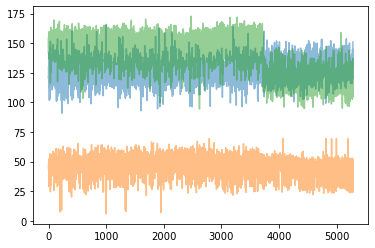

In [62]:
plt.plot(masses[:,0], alpha=0.5)
plt.plot(masses[:,1], alpha=0.5)
plt.plot(masses[:,2], alpha=0.5)
plt.savefig(sf('figs'))

In [94]:
deltas.shape

(5283, 36, 3)

In [95]:
prmat.shape

(144, 4)

In [96]:
bigm.shape

(5283, 144, 4)

In [97]:
bigm[0,:,:].shape

(144, 4)

In [99]:
bigm2 = bigm.reshape(5283, 36, 4, 4)

In [100]:
bigm2.shape

(5283, 36, 4, 4)

In [106]:
np.array([[0,0,0,0],
                        [0,0,0,0],
                        [0,0,0,0]])

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [108]:
np.array([deltas[0,0,:], 0])

<ipython-input-108-f2e60e785430>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array([deltas[0,0,:], 0])


array([array([0., 0., 0.]), 0], dtype=object)

In [110]:
np.hstack((deltas[0,0,:],0))

array([0., 0., 0., 0.])

In [113]:
np.vstack((np.array([[0,0,0,0],
                        [0,0,0,0],
                        [0,0,0,0]]),np.hstack((deltas[0,0,:],0)).transpose()))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [120]:
np.vstack((np.array([[0,0,0,0],
                        [0,0,0,0],
                        [0,0,0,0]]),np.hstack((deltas[5,0,:],0)).transpose())).transpose()

array([[ 0.        ,  0.        ,  0.        , -0.14118223],
       [ 0.        ,  0.        ,  0.        , -0.86103197],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

In [123]:
np.array([[0,0,0],
                        [0,0,0],
                        [0,0,0],
                    [0,0,0]])

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [124]:
np.hstack((deltas[5,0,:],0))

array([-0.14118223, -0.86103197,  0.        ,  0.        ])

In [127]:
np.hstack((np.array([[0,0,0],
                        [0,0,0],
                        [0,0,0],
                    [0,0,0]]),np.expand_dims(np.hstack((deltas[5,0,:],0)),axis=1)))

array([[ 0.        ,  0.        ,  0.        , -0.14118223],
       [ 0.        ,  0.        ,  0.        , -0.86103197],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

In [128]:
bigm2[0,0,:,:]+np.hstack((np.array([[0,0,0],
                        [0,0,0],
                        [0,0,0],
                    [0,0,0]]),np.expand_dims(np.hstack((deltas[5,0,:],0)),axis=1)))

array([[ 7.40390630e+02,  0.00000000e+00, -4.57031250e+01,
        -1.82807231e+05],
       [ 0.00000000e+00,  7.40390630e+02, -2.72187500e+01,
        -9.90718610e+04],
       [ 0.00000000e+00,  0.00000000e+00, -5.07812500e-02,
        -1.21000000e+02],
       [ 0.00000000e+00,  0.00000000e+00, -5.07812500e-02,
        -1.21000000e+02]])

In [103]:
bigm2[0,0,:,:]+np.vstack((np.array([[0,0,0,0],
                        [0,0,0,0],
                        [0,0,0,0]]),deltas[0,0,:])).transpose()

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 4 and the array at index 1 has size 3

In [130]:
np.zeros([4,3])

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [141]:
np.repeat([0],36,axis=0)

(36,)

In [142]:
deltas[2,:,:].shape

(36, 3)

In [145]:
np.expand_dims(np.repeat([0],36,axis=0),axis=1).shape

(36, 1)

In [152]:
deltas.shape

(5283, 36, 3)

In [160]:
np.repeat([0],36,axis=0).shape

(36,)

In [162]:
np.expand_dims(np.repeat([0],36,axis=0),axis=(0,2)).shape

(1, 36, 1)

In [156]:
np.repeat(np.expand_dims(np.repeat([0],36,axis=0),axis=1), deltas.shape[0], axis=0).shape

(190188, 1)

In [163]:
np.hstack(np.expand_dims(np.repeat([0],36,axis=0),axis=(0,2)).shape

SyntaxError: unexpected EOF while parsing (<ipython-input-163-b5199713b278>, line 1)

In [ ]:
np.expand_dims(np.repeat([0],36,axis=0),axis=(0,2)).shape

In [165]:
np.repeat(np.expand_dims(np.repeat([0],36,axis=0),axis=(0,2)), deltas.shape[0], axis=0).shape

(5283, 36, 1)

In [166]:
deltas.shape

(5283, 36, 3)

In [173]:
bigm2.shape

(5283, 36, 4, 4)

In [182]:
np.zeros([5283,36,4,3]).shape

(5283, 36, 4, 3)

In [172]:
np.repeat(np.zeros([5283,36,4,3]),36,axis=1).shape

(4, 108)

In [ ]:
np.concatenate((deltas,np.repeat(np.expand_dims(np.repeat([0],36,axis=0), axis=(0,2)), deltas.shape[0], axis=0)),axis=2),axis=0

In [185]:
np.concatenate((np.zeros([5283,36,4,3]), np.expand_dims(np.concatenate((deltas,np.repeat(np.expand_dims(np.repeat([0],36,axis=0),axis=(0,2)), deltas.shape[0], axis=0)),axis=2),axis=3)),axis=3).shape

(5283, 36, 4, 4)

In [181]:
np.concatenate((deltas,np.repeat(np.expand_dims(np.repeat([0],36,axis=0),axis=(0,2)), deltas.shape[0], axis=0)),axis=2).shape

(5283, 36, 4)

In [183]:
np.expand_dims(np.concatenate((deltas,np.repeat(np.expand_dims(np.repeat([0],36,axis=0),axis=(0,2)), deltas.shape[0], axis=0)),axis=2),axis=3).shape

(5283, 36, 4, 1)

In [186]:
delta5 = np.concatenate((np.zeros([5283,36,4,3]), np.expand_dims(np.concatenate((deltas,np.repeat(np.expand_dims(np.repeat([0],36,axis=0),axis=(0,2)), deltas.shape[0], axis=0)),axis=2),axis=3)),axis=3)

In [187]:
ab = bigm2 + delta5

In [188]:
ab.shape

(5283, 36, 4, 4)

In [192]:
bigm2[0,0,:,:]

array([[ 7.4039063e+02,  0.0000000e+00, -4.5703125e+01, -1.8280709e+05],
       [ 0.0000000e+00,  7.4039063e+02, -2.7218750e+01, -9.9071000e+04],
       [ 0.0000000e+00,  0.0000000e+00, -5.0781250e-02, -1.2100000e+02],
       [ 0.0000000e+00,  0.0000000e+00, -5.0781250e-02, -1.2100000e+02]])

In [197]:
bigm3[0,0,:,:]

array([[ 7.4039063e+02,  0.0000000e+00, -4.5703125e+01, -1.8280709e+05],
       [ 0.0000000e+00,  7.4039063e+02, -2.7218750e+01, -9.9071000e+04],
       [ 0.0000000e+00,  0.0000000e+00, -5.0781250e-02, -1.2100000e+02],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  1.0000000e+00]])

In [199]:
bigm3.shape

(5283, 36, 4, 4)

In [207]:
np.expand_dims([0,0,0,1], axis = (0,1,2)).shape

(1, 1, 1, 4)

In [212]:
np.repeat(np.repeat(np.expand_dims([0,0,0,1], axis = (0,1)),36,axis=1), 5283, axis=0).shape

(5283, 36, 4)

In [214]:
bigm3[:,:,3,:] = np.repeat(np.repeat(np.expand_dims([0,0,0,1], axis = (0,1)),36,axis=1), 5283, axis=0)

In [195]:
bigm3 = np.copy(bigm2)

In [215]:
bigm3[0,0,:,:]

array([[ 7.4039063e+02,  0.0000000e+00, -4.5703125e+01, -1.8280709e+05],
       [ 0.0000000e+00,  7.4039063e+02, -2.7218750e+01, -9.9071000e+04],
       [ 0.0000000e+00,  0.0000000e+00, -5.0781250e-02, -1.2100000e+02],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  1.0000000e+00]])

In [217]:
ab = bigm3 + np.concatenate((np.zeros([5283,36,4,3]), np.expand_dims(np.concatenate((deltas,np.repeat(np.expand_dims(np.repeat([0],36,axis=0),axis=(0,2)), deltas.shape[0], axis=0)),axis=2),axis=3)),axis=3)

In [221]:
np.repeat(np.repeat(np.expand_dims(np.eye(4),axis=(0,1)), 36, axis=1), 5283, axis=0).shape

(5283, 36, 4, 4)

In [224]:
np.matmul(linalg.inv(bigm3),ab).shape

(5283, 36, 4, 4)

In [225]:
delta6 = (np.matmul(linalg.inv(bigm3),ab)-np.repeat(np.repeat(np.expand_dims(np.eye(4),axis=(0,1)), 36, axis=1), 5283, axis=0))

In [230]:
newz = np.matmul(linalg.inv(bigm3),ab)

In [226]:
delta6.shape

(5283, 36, 4, 4)

In [ ]:
delta6[0,0,:,:]

In [136]:
np.hstack((np.repeat(np.zeros([4,3]),36,axis=1),np.expand_dims(np.hstack((deltas[2,:,:],0)),axis=1)))

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [ ]:
ab = bigm2[0,0,:,:]+

In [ ]:
i = 0
j = 0
a = 
ab = bigm2[0,0,:,:]+np.hstack((np.array([[0,0,0],
                        [0,0,0],
                        [0,0,0],
                    [0,0,0]]),np.expand_dims(np.hstack((deltas[i,j,:],0)),axis=1)))
np.matmul(linalg.inv(bigm2[i,j,:,:]),

In [478]:
bigm2.shape

(5283, 36, 4, 4)

(36328, 4)
[121.10617155  56.74105373 158.76739705   1.        ]


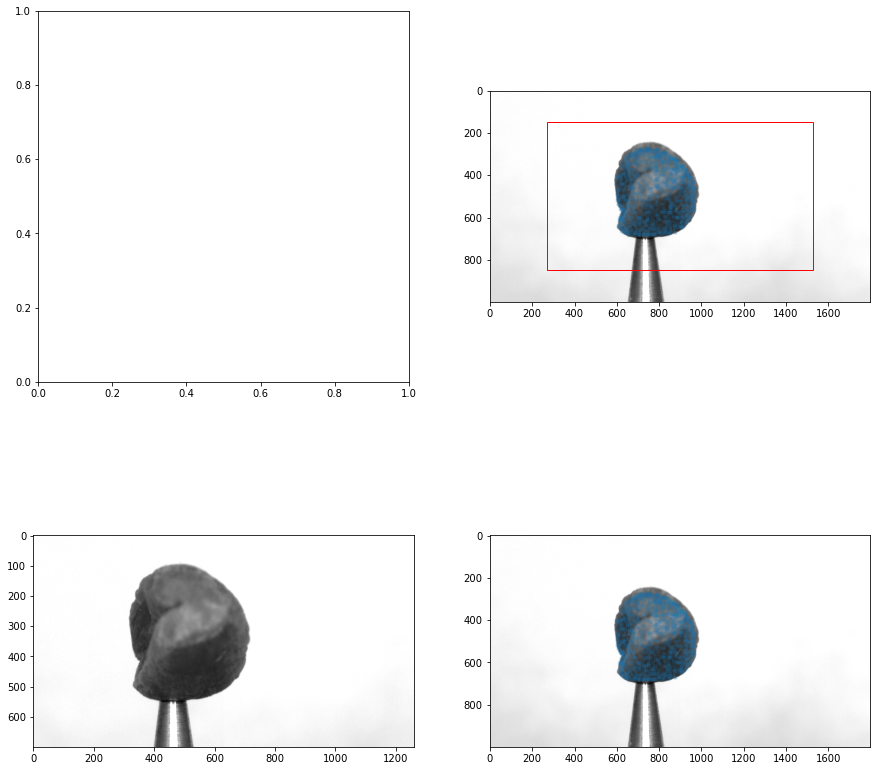

In [477]:
h = 1000
hc = 700
hn = 250
angle = 0
w, wc, wn = h*1.8, hc*1.8, hn*1.8
k = hn/hc
mu=1
flname = '1484737/1494452'
img = np.asarray(io.imread('C:/cherepashkin1/phenoseed/598/'+flname+'/rotation_'+str(10*angle).zfill(3)+'.tif'))
pcd = np.asarray(open3d.io.read_point_cloud('C:/cherepashkin1/phenoseed/598/'+flname+'_Surface.ply').points)
prmat = prmatread('C:/cherepashkin1/phenoseed/598/'+flname+'_ProjectionMatrices.txt')
new_h = 700
new_w = 1260
img0 = 255-img
cms = [int(h/2), int(w/2)]
tempa = (img[cms[0] - new_h//2: cms[0] + new_h//2,
         cms[1] - new_w//2: cms[1] + new_w//2]).astype(np.uint8)
padh = (new_h-tempa.shape[0])//2
padw = (new_w-tempa.shape[1])//2
tempb = np.pad(
    tempa, ((padh, new_h-tempa.shape[0]-padh),
            (padw, new_w-tempa.shape[1]-padw)),
    mode='constant', constant_values=0)
new_img = np.squeeze(
    transform.resize(tempb,(250, 450),
        preserve_range=True))
pr0 = prmat[angle*4:4*(angle+1),:]
f, ((a0, a1), (a2, a3)) = plt.subplots(2, 2, figsize=(15,15))
pcd1 = np.concatenate((pcd, np.expand_dims(np.repeat(1,
    pcd.shape[0]), axis = 1)), axis=1)
pcd1 = np.matmul(pcd1,pr0.T)
pcd1 = pcd1/np.repeat(np.expand_dims(pcd1[:,3], axis=1), 4, axis = 1)
pcd2 = forwardproj(pcd,bigm2[2000,0,:,:])
print(pcd1.shape)
origin = np.hstack((np.mean(pcd,axis=0),1))
print(origin)
origin1 = np.matmul(origin,pr0.T)
origin2 = origin1/origin1[3]
a0.set_aspect('equal', adjustable='box')
a1.imshow(img, cmap='gray')
a1.scatter(pcd1[::25,0], pcd1[::25,1], alpha = 0.1, s=10)
a1.add_patch(patches.Rectangle((cms[1]-1260/2, cms[0]-700/2), 1260, 700, linewidth=1, edgecolor='r', facecolor='none'))
# tip = np.squeeze(forwardproj(np.array([[0,0,0]]),prmat[:4,:4])-[r2[0,2], r2[1,2], 0])
# tip = np.squeeze(forwardproj(np.array([[0,0,0]]),prmat[:4,:4]))
# a1.scatter(tip[1], tip[0])
a2.imshow(tempb, cmap='gray')
a3.imshow(img, cmap='gray')
a3.scatter(pcd2[::25,0], pcd2[::25,1], s=10, alpha = 0.1)


# check delta on one example

In [228]:
# bigm = np.zeros([5283,144,4])
i =0
for root, structure, files in os.walk('C:/cherepashkin1/phenoseed/598'):
    for file in files:
        if '1484737' in root and '1494452_Surface.ply' in file:
            print(i)
        if 'Surface.ply' in file:
            i+=1
#             bigm[i,:,:] = prmatread(os.path.join(root, file))

#             bigm[i,:,:] = print(file)

2403


In [288]:
len(cip)

5283

In [286]:
# bigm = np.zeros([5283,144,4])
# i =0
cip = []
for root, structure, files in os.walk('C:/cherepashkin1/phenoseed/598'):
    for file in files:
        if 'Surface.ply' in file:
#             cip.append()
            cip.append(os.path.join(root, file).split('\\')[-2]+'_'+os.path.join(root, file).split('\\')[-1].replace('_Surface.ply', ''))
#         if '1484737' in root and '1494452_Surface.ply' in file:
#             print(i)
#         if 'Surface.ply' in file:
#             i+=1
#             bigm[i,:,:] = prmatread(os.path.join(root, file))

#             bigm[i,:,:] = print(file)

In [290]:
with open("598prmat_names.txt", 'a') as f:
    for i in cip:
        f.write(i + "\n")
#     original_stdout = sys.stdout
#     sys.stdout = f  # Change the standard output to the file we created.
#     print(smodel)
    # Reset the standard output to its original value
#     sys.stdout = original_stdout
#     f.write(cip)

In [287]:
cip[:10]

['1484717_1491988',
 '1484717_1491989',
 '1484717_1491990',
 '1484717_1491991',
 '1484717_1491992',
 '1484717_1491993',
 '1484717_1491994',
 '1484717_1491995',
 '1484717_1491996',
 '1484717_1491997']

In [229]:
delta6.shape

(5283, 36, 4, 4)

In [231]:
newz.shape

(5283, 36, 4, 4)

In [248]:
newz[2403, 0, :,:]

array([[ 1.00000000e+00,  0.00000000e+00, -4.33680869e-18,
        -3.05776432e-04],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
        -6.97765691e-04],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [236]:
pcd2 = forwardproj(pcd, newz[2403, 0, :,:])

In [234]:
pcd2 = np.concatenate((pcd, np.expand_dims(np.repeat(1, pcd.shape[0]), axis = 1)), axis=1)
pcd2 = np.matmul(pcd2,newz[2403, 0, :,:].T)
pcd2.shape
pcd2 = pcd2/np.repeat(np.expand_dims(pcd2[:,3], axis=1), 4, axis = 1)

(36328, 4)

In [235]:
pcd2[:,3]

array([1., 1., 1., ..., 1., 1., 1.])

In [233]:
pcd2.shape

(36328, 3)

In [237]:
bigm2[2403,0,:,:]

array([[ 7.4039063e+02,  0.0000000e+00, -4.5703125e+01, -1.8263947e+05],
       [ 0.0000000e+00,  7.4039063e+02, -2.7218750e+01, -9.8688500e+04],
       [ 0.0000000e+00,  0.0000000e+00, -5.0781250e-02, -1.2100000e+02],
       [ 0.0000000e+00,  0.0000000e+00, -5.0781250e-02, -1.2100000e+02]])

In [238]:
bigm3[2403,0,:,:]

array([[ 7.4039063e+02,  0.0000000e+00, -4.5703125e+01, -1.8263947e+05],
       [ 0.0000000e+00,  7.4039063e+02, -2.7218750e+01, -9.8688500e+04],
       [ 0.0000000e+00,  0.0000000e+00, -5.0781250e-02, -1.2100000e+02],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  1.0000000e+00]])

(36328, 4)
[121.10617155  56.74105373 158.76739705   1.        ]


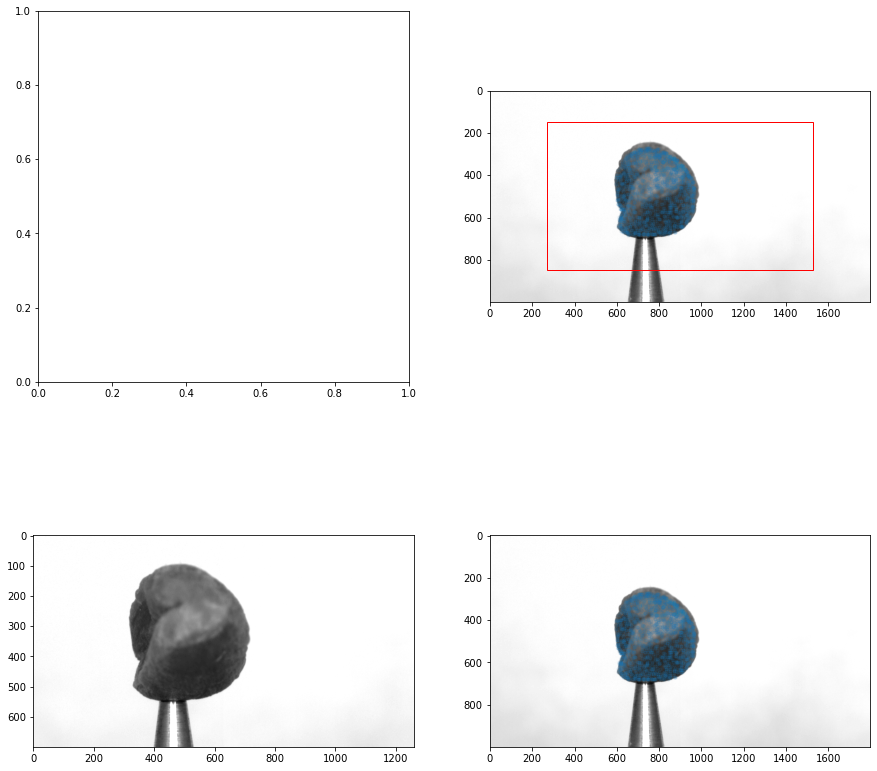

In [268]:
h = 1000
hc = 700
hn = 250
angle = 0
w, wc, wn = h*1.8, hc*1.8, hn*1.8
k = hn/hc
mu=1
flname = '1484737/1494452'
img = np.asarray(io.imread('C:/cherepashkin1/phenoseed/598/'+flname+'/rotation_'+str(10*angle).zfill(3)+'.tif'))
pcd = np.asarray(open3d.io.read_point_cloud('C:/cherepashkin1/phenoseed/598/'+flname+'_Surface.ply').points)
prmat = prmatread('C:/cherepashkin1/phenoseed/598/'+flname+'_ProjectionMatrices.txt')
new_h = 700
new_w = 1260
img0 = 255-img
cms = [int(h/2), int(w/2)]
tempa = (img[cms[0] - new_h//2: cms[0] + new_h//2,
         cms[1] - new_w//2: cms[1] + new_w//2]).astype(np.uint8)
padh = (new_h-tempa.shape[0])//2
padw = (new_w-tempa.shape[1])//2
tempb = np.pad(
    tempa, ((padh, new_h-tempa.shape[0]-padh),
            (padw, new_w-tempa.shape[1]-padw)),
    mode='constant', constant_values=0)
new_img = np.squeeze(
    transform.resize(tempb,(250, 450),
        preserve_range=True))
pr0 = prmat[angle*4:4*(angle+1),:]
f, ((a0, a1), (a2, a3)) = plt.subplots(2, 2, figsize=(15,15))
pcd1 = np.concatenate((pcd, np.expand_dims(np.repeat(1,
    pcd.shape[0]), axis = 1)), axis=1)
pcd1 = np.matmul(pcd1,pr0.T)
pcd1 = pcd1/np.repeat(np.expand_dims(pcd1[:,3], axis=1), 4, axis = 1)
# pcd2 = forwardproj(pcd, newz[2403, 0, :,:])
# pcd3 = forwardproj(pcd2, bigm2[2403,0,:,:])
print(pcd1.shape)
origin = np.hstack((np.mean(pcd,axis=0),1))
print(origin)
origin1 = np.matmul(origin,pr0.T)
origin2 = origin1/origin1[3]
a0.set_aspect('equal', adjustable='box')
a1.imshow(img, cmap='gray')
a1.scatter(pcd1[::25,0], pcd1[::25,1], alpha = 0.1, s=10)
a1.add_patch(patches.Rectangle((cms[1]-1260/2, cms[0]-700/2), 1260, 700, linewidth=1, edgecolor='r', facecolor='none'))
# tip = np.squeeze(forwardproj(np.array([[0,0,0]]),prmat[:4,:4])-[r2[0,2], r2[1,2], 0])
# tip = np.squeeze(forwardproj(np.array([[0,0,0]]),prmat[:4,:4]))
# a1.scatter(tip[1], tip[0])
pcd2 = forwardproj(pcd,np.matmul(linalg.inv(bigm3[0,0,:,:]), bigm3[2403,0,:,:]))
pcd3 = forwardproj(pcd2,bigm2[0,0,:,:])
a2.imshow(tempb, cmap='gray')
a3.imshow(img, cmap='gray')
a3.scatter(pcd3[::25,0], pcd3[::25,1], alpha = 0.1, s=10)

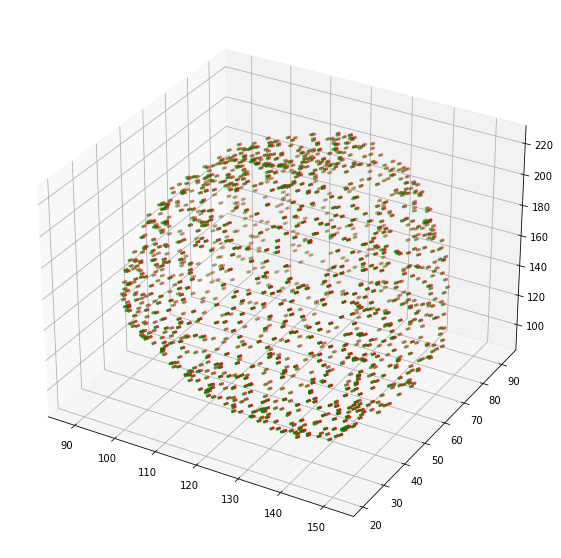

In [265]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(pcd2[::25,0], pcd2[::25,1], pcd2[::25,2], c='r', s=5)
ax.scatter(pcd[::25,0], pcd[::25,1], pcd[::25,2], c='g', s=5)

In [266]:
pcd2 - pcd

array([[0.22639401, 0.51661918, 0.        ],
       [0.22639401, 0.51661918, 0.        ],
       [0.22639401, 0.51661918, 0.        ],
       ...,
       [0.22639401, 0.51661918, 0.        ],
       [0.22639401, 0.51661918, 0.        ],
       [0.22639401, 0.51661918, 0.        ]])

In [250]:
pr0

array([[ 7.4039063e+02,  0.0000000e+00, -4.5703125e+01, -1.8263947e+05],
       [ 0.0000000e+00,  7.4039063e+02, -2.7218750e+01, -9.8688500e+04],
       [ 0.0000000e+00,  0.0000000e+00, -5.0781250e-02, -1.2100000e+02],
       [ 0.0000000e+00,  0.0000000e+00, -5.0781250e-02, -1.2100000e+02]])

In [253]:
deltas.shape

(5283, 36, 3)

In [254]:
deltas[2403, 0, :]

array([-0.22639401, -0.51661918,  0.        ])

In [259]:
np.hstack((np.zeros([3,3]),np.expand_dims(deltas[2403, 0, :], axis=1)))

array([[ 0.        ,  0.        ,  0.        , -0.22639401],
       [ 0.        ,  0.        ,  0.        , -0.51661918],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

In [260]:
np.matmul(linalg.pinv(pr0[:3,:]), 
          pr0[:3,:]+np.hstack((np.zeros([3,3]),np.expand_dims(deltas[2403, 0, :], axis=1))))

array([[ 9.98256602e-01, -7.99890850e-04,  4.17099372e-02,
        -3.22190021e-04],
       [-7.99890850e-04,  9.99633001e-01,  1.91369893e-02,
        -7.05296431e-04],
       [ 4.17099372e-02,  1.91369893e-02,  2.11057313e-03,
         3.92686937e-04],
       [-1.75048161e-05, -8.03140693e-06,  4.18793987e-04,
         9.99999835e-01]])

In [263]:
pcd2 = forwardproj(pcd,np.matmul(linalg.inv(bigm3[0,0,:,:]), bigm3[2403,0,:,:]))

In [274]:
with np.printoptions(precision=2, suppress=True):
    print(np.matmul(linalg.inv(bigm3[0,10,:,:]), bigm3[2403,10,:,:]))

[[ 1.    0.   -0.   -0.04]
 [ 0.    1.   -0.    0.  ]
 [-0.    0.    1.   -0.24]
 [ 0.    0.    0.    1.  ]]


In [273]:
with np.printoptions(precision=2, suppress=True):
    print(np.matmul(linalg.pinv(bigm2[0,0,:3,:]), bigm2[2403,0,:3,:]))

[[ 1.   -0.    0.04  0.23]
 [-0.    1.    0.02  0.52]
 [ 0.04  0.02  0.    0.02]
 [-0.   -0.    0.    1.  ]]


In [291]:
import torch

In [ ]:
#     def forwardproj(pcd, pr):
        pcd2 = np.concatenate((pcd, np.expand_dims(np.repeat(1, pcd.shape[0]), axis=1)), axis=1)
        pcd2 = np.matmul(pcd2, pr.T)
        pcd2 = pcd2 / np.repeat(np.expand_dims(pcd2[:, 3], axis=1), 4, axis=1)
#         return (pcd2[:, :3])

In [292]:
pcd4 = torch.Tensor(pcd)

In [298]:
pcd5 = torch.cat((pcd4, torch.unsqueeze(torch.ones(pcd4.shape[0]), axis=1)), axis=1)

In [301]:
pr1 = torch.Tensor(pr0)

In [302]:
torch.matmul(pcd5, pr1)

tensor([[ 1.0069e+05,  2.8875e+04, -7.2819e+03, -2.8699e+07],
        [ 9.8472e+04,  2.6654e+04, -7.0632e+03, -2.7855e+07],
        [ 9.9212e+04,  2.6654e+04, -7.1089e+03, -2.8038e+07],
        ...,
        [ 8.3664e+04,  5.2568e+04, -7.1083e+03, -2.7672e+07],
        [ 8.3664e+04,  5.3308e+04, -7.1355e+03, -2.7771e+07],
        [ 8.4405e+04,  5.1087e+04, -7.0996e+03, -2.7658e+07]])

In [306]:
torch.matmul(pcd5, pr1).shape

torch.Size([36328, 4])

In [303]:
pcd5.shape

torch.Size([36328, 4])

In [316]:
pcd4 = torch.zeros([10,1500])

In [309]:
pcd6 = torch.einsum('ij,jk->ik',pcd5, pr1)

In [312]:
pcd6.shape

torch.Size([36328, 4])

In [321]:
pcd4.shape

torch.Size([10, 1500])

In [325]:
pcd4.reshape([pcd4.shape[0],3,-1]).shape

torch.Size([10, 3, 500])

In [326]:
nsp=500

In [394]:
pcd4.shape

torch.Size([10, 1500])

In [401]:
pcd5 = torch.cat((pcd4.reshape([pcd4.shape[0],3,-1]),torch.ones(nsp).repeat(pcd4.shape[0],1,1)), axis=1)

In [402]:
pcd5.shape

torch.Size([10, 4, 500])

In [ ]:
prmat

In [405]:
pcd6 = torch.einsum('ijk,jn->ink',pcd5, pr1)

In [411]:
print(pcd5.shape, pr2.shape)

torch.Size([10, 4, 500]) torch.Size([10, 4, 4])


In [412]:
pcd6 = torch.einsum('ijk,ijn->ikn',pcd5, pr2)

In [413]:
pcd6.shape

torch.Size([10, 500, 4])

In [407]:
pr1.shape

torch.Size([4, 4])

In [409]:
pr2 = pr1.repeat(10, 1, 1)

In [410]:
pr2.shape

torch.Size([10, 4, 4])

In [406]:
pcd6.shape

torch.Size([10, 4, 500])

In [404]:
pcd7 = pcd6/torch.unsqueeze(pcd6[:,3,:],axis=1)

In [388]:
torch.unsqueeze(torch.unsqueeze(torch.ones(nsp), axis=0),axis=1).repeat(3,axis=1)

TypeError: repeat() got an unexpected keyword argument 'axis'

In [318]:
pcd5 = torch.cat((pcd4, torch.unsqueeze(torch.ones(pcd4.shape[1]), axis=1)), axis=1)
pcd6 = torch.einsum('ij,jk->ik',pcd5, pr1)
pcd7 = pcd6/torch.unsqueeze(pcd6[:,3],axis=1)

RuntimeError: Sizes of tensors must match except in dimension 1. Expected size 10 but got size 1500 for tensor number 1 in the list.

In [314]:
pcd7[0,:]

tensor([-3.5086e-03, -1.0061e-03,  2.5373e-04,  1.0000e+00])

In [299]:
pcd5.shape

torch.Size([36328, 4])

In [263]:
pcd2 = forwardproj(pcd,np.matmul(linalg.inv(bigm3[0,0,:,:]), bigm3[2403,0,:,:]))

In [338]:
dt = np.array([np.matmul(linalg.inv(bigm3[0,0,:,:]), bigm3[i,0,:,:])[:3,3] for i in range(bigm3.shape[0])])

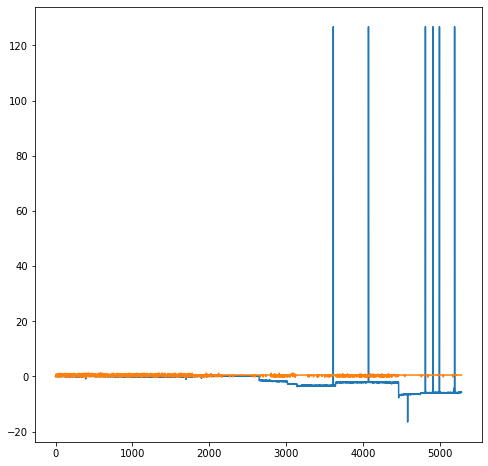

In [344]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
plt.plot(dt[:,0])
plt.plot(dt[:,1])
# plt.plot(dt[:,2])

In [362]:
ar = dt[:,0]
# np.where(np.abs(dt[:,]-np.mean(dt[0,:])) > 6*np.std(dt[0,:]))[0]

In [363]:
np.where(np.abs(ar-np.mean(ar)) > 6*np.std(ar))[0]

array([3614, 4072, 4813, 4912, 4995, 4996, 5193], dtype=int64)

In [368]:
list(np.where(np.abs(ar-np.mean(ar)) > 6*np.std(ar))[0])

[3614, 4072, 4813, 4912, 4995, 4996, 5193]

In [373]:
with open('C:/circles/finetune_test/598_exceptions.txt', 'r') as f:
    exceptions = f.readlines()

In [374]:
exceptions

['1484755/1500207\n',
 '1484746/1496708\n',
 '1484744/1496403\n',
 '1484750/1499535\n',
 '1484756/1500332\n',
 '1484757/1500409\n',
 '1484757/1500378\n',
 '1484757/1500434\n',
 '1484755/1500159\n',
 '1484722/1492651\n',
 '1484754/1499988\n',
 '1484760/1500780\n',
 '1484753/1499941\n',
 '1484717/1492080\n',
 '1484760/1500856\n',
 '1484740/1494895\n',
 '1484720/1492389\n',
 '1484756/1500326\n',
 '1484753/1499858\n',
 '1484756/1500264\n',
 '1484725/1493000\n',
 '1484733/1494044\n',
 '1484760/1500762\n',
 '1484754/1500044\n',
 '1484753/1499888\n',
 '1484739/1494723\n',
 '1484743/1495658\n',
 '1484737/1494534\n',
 '1484749/1499418\n',
 '1484757/1500472\n',
 '1484756/1500278\n',
 '1484759/1500612\n',
 '1484757/1500396\n',
 '1484753/1499926\n',
 '1484754/1499992\n',
 '1484757/1500439\n',
 '1484738/1494622\n',
 '1484719/1492354\n',
 '1484755/1500165\n',
 '1484755/1500084\n',
 '1484754/1500038\n',
 '1484724/1492910\n',
 '1484722/1492687\n',
 '1484760/1500859\n',
 '1484724/1492949\n',
 '1484755/

In [380]:
for i in range(len(a)):
    try:
        exceptions.index(a[i])
    except:
        print(1)
#         print(a[i])


1
1
1
1
1
1
1


In [375]:
a = [cip[i] for i in list(np.where(np.abs(ar-np.mean(ar)) > 6*np.std(ar))[0])]

In [383]:
[a[i].replace('_','/') for i in range(7)]

['1484747/1496732',
 '1484750/1499558',
 '1484757/1500370',
 '1484757/1500470',
 '1484758/1500557',
 '1484758/1500558',
 '1484760/1500768']

In [384]:
for i in range(7):
    print(a[i].replace('_','/'))

1484747/1496732
1484750/1499558
1484757/1500370
1484757/1500470
1484758/1500557
1484758/1500558
1484760/1500768


In [ ]:
a = np.concatenate((a,np.where(np.abs(ar-np.mean(ar)) > 6*np.std(ar))[0]))


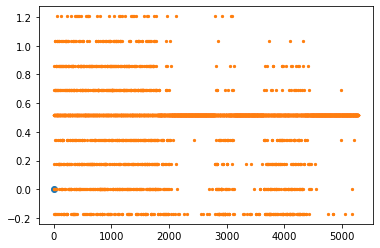

In [353]:
plt.scatter(0,0)
plt.scatter(np.arange(dt.shape[0]),dt[:,1], s=5)

(-10.0, 2.0)

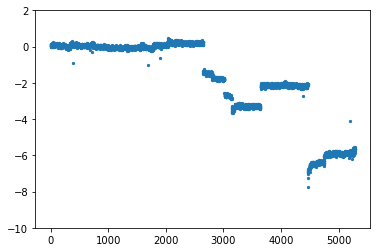

In [358]:
# plt.scatter(0,0)
plt.scatter(np.arange(dt.shape[0]),dt[:,0], s=5)
plt.ylim(-10,2)

# find 2d delta from 3d delta

In [414]:
pr0

array([[ 7.4039063e+02,  0.0000000e+00, -4.5703125e+01, -1.8263947e+05],
       [ 0.0000000e+00,  7.4039063e+02, -2.7218750e+01, -9.8688500e+04],
       [ 0.0000000e+00,  0.0000000e+00, -5.0781250e-02, -1.2100000e+02],
       [ 0.0000000e+00,  0.0000000e+00, -5.0781250e-02, -1.2100000e+02]])

In [416]:
with np.printoptions(precision=2, suppress= True):
    print(pr0-bigm2[0,0,:,:])

[[  0.     0.     0.   167.62]
 [  0.     0.     0.   382.5 ]
 [  0.     0.     0.     0.  ]
 [  0.     0.     0.     0.  ]]


In [419]:
(pr0-bigm2[0,0,:,:])[0,3]

167.61999999999534

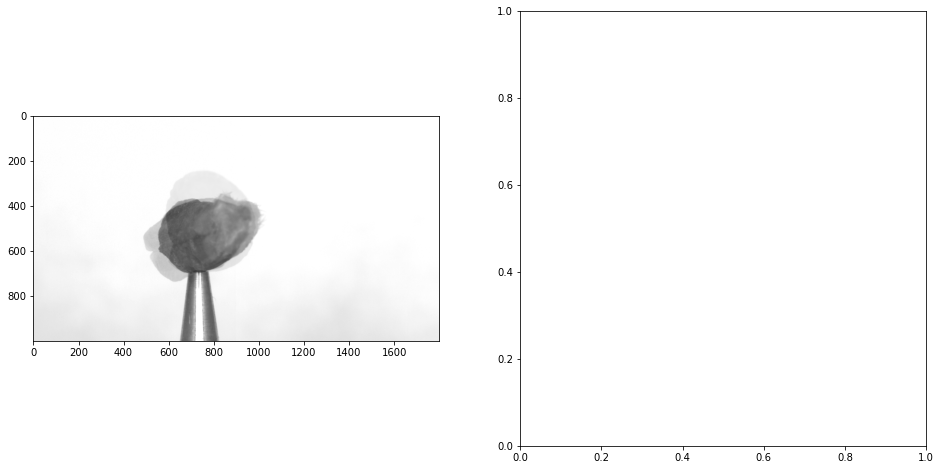

In [429]:
fig, ax = plt.subplots(1,2, figsize = (16, 8))
ax[0].imshow(img, cmap='gray', alpha=0.5)
img0 = np.asarray(io.imread('C:/cherepashkin1/phenoseed/598/1484717/1491988/rotation_000.tif'))
ax[0].imshow(img0, cmap='gray', alpha=0.5)
ax[0].imshow(np.asarray(io.imread('C:/cherepashkin1/phenoseed/598/1484717/1491989/rotation_000.tif')), cmap='gray', alpha=0.5)

In [538]:
cip[5000]

'1484758_1500562'

(34366, 4)
[144.06643194  52.83247978 112.1797998    1.        ]


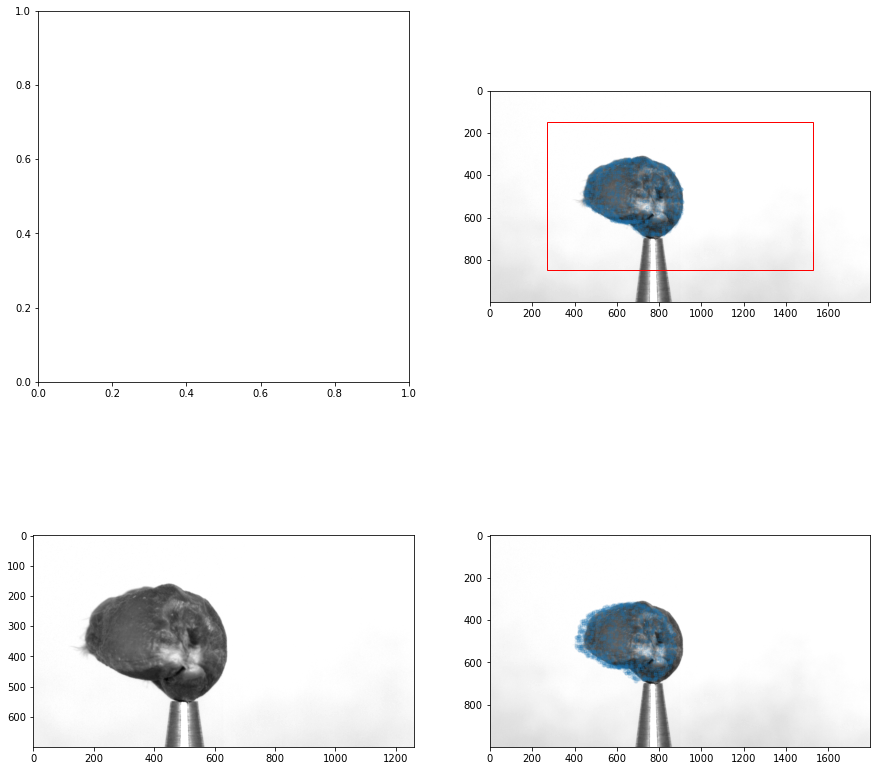

In [539]:
h = 1000
hc = 700
hn = 250
angle = 0
w, wc, wn = h*1.8, hc*1.8, hn*1.8
k = hn/hc
mu=1
# flname = '1484737/1494452'
flname = '1484758/1500562'
img = np.asarray(io.imread('C:/cherepashkin1/phenoseed/598/'+flname+'/rotation_'+str(10*angle).zfill(3)+'.tif'))
pcd = np.asarray(open3d.io.read_point_cloud('C:/cherepashkin1/phenoseed/598/'+flname+'_Surface.ply').points)
prmat = prmatread('C:/cherepashkin1/phenoseed/598/'+flname+'_ProjectionMatrices.txt')
new_h = 700
new_w = 1260
img0 = 255-img
cms = [int(h/2), int(w/2)]
tempa = (img[cms[0] - new_h//2: cms[0] + new_h//2,
         cms[1] - new_w//2: cms[1] + new_w//2]).astype(np.uint8)
padh = (new_h-tempa.shape[0])//2
padw = (new_w-tempa.shape[1])//2
tempb = np.pad(
    tempa, ((padh, new_h-tempa.shape[0]-padh),
            (padw, new_w-tempa.shape[1]-padw)),
    mode='constant', constant_values=0)
new_img = np.squeeze(
    transform.resize(tempb,(250, 450),
        preserve_range=True))
pr0 = prmat[angle*4:4*(angle+1),:]
f, ((a0, a1), (a2, a3)) = plt.subplots(2, 2, figsize=(15,15))
pcd1 = np.concatenate((pcd, np.expand_dims(np.repeat(1,
    pcd.shape[0]), axis = 1)), axis=1)
pcd1 = np.matmul(pcd1,pr0.T)
pcd1 = pcd1/np.repeat(np.expand_dims(pcd1[:,3], axis=1), 4, axis = 1)
# pcd2 = forwardproj(pcd, newz[2403, 0, :,:])
# pcd3 = forwardproj(pcd2, bigm2[2403,0,:,:])
print(pcd1.shape)
origin = np.hstack((np.mean(pcd,axis=0),1))
print(origin)
origin1 = np.matmul(origin,pr0.T)
origin2 = origin1/origin1[3]
a0.set_aspect('equal', adjustable='box')
a1.imshow(img, cmap='gray')
a1.scatter(pcd1[::25,0], pcd1[::25,1], alpha = 0.1, s=10)
a1.add_patch(patches.Rectangle((cms[1]-1260/2, cms[0]-700/2), 1260, 700, linewidth=1, edgecolor='r', facecolor='none'))
# tip = np.squeeze(forwardproj(np.array([[0,0,0]]),prmat[:4,:4])-[r2[0,2], r2[1,2], 0])
# tip = np.squeeze(forwardproj(np.array([[0,0,0]]),prmat[:4,:4]))
# a1.scatter(tip[1], tip[0])
pcd2 = forwardproj(pcd,np.matmul(linalg.inv(bigm3[0,0,:,:]), bigm3[2403,0,:,:]))
pcd3 = forwardproj(pcd2,bigm2[0,0,:,:])
a2.imshow(tempb, cmap='gray')
a3.imshow(img, cmap='gray')
a3.scatter(pcd3[::25,0], pcd3[::25,1], alpha = 0.1, s=10)

# Check that tip is at the same position for all the seeds for the same angle

0
1
2
3
4
5
6
7
8
9


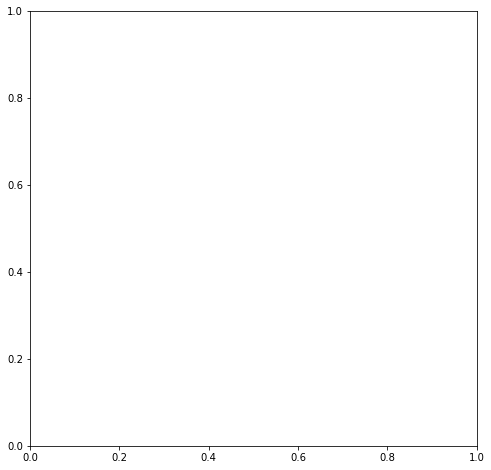

In [438]:
fig, ax = plt.subplots(1,1, figsize = (8, 8))
i=0
images = np.zeros([10,1000,1800])
for root, structure, files in os.walk('C:/cherepashkin1/phenoseed/598'):
    for file in files:
        if 'rotation_000.tif' in file:
            print(i)
            images[i] = np.asarray(io.imread(os.path.join(root,file)))
#             ax.imshow(img, cmap='gray', alpha=0.5)
#             bigm[i,:,:] = prmatread(os.path.join(root, file))
            i+=1
    if i == 10:
        break

#img0 = np.asarray(io.imread('C:/cherepashkin1/phenoseed/598/1484717/1491988/rotation_000.tif'))
#ax[0].imshow(img0, cmap='gray', alpha=0.5)
#ax[0].imshow(np.asarray(io.imread('C:/cherepashkin1/phenoseed/598/1484717/1491989/rotation_000.tif')), cmap='gray', alpha=0.5)

In [441]:
cip2 = []
for root, structure, files in os.walk('C:/cherepashkin1/phenoseed/598'):
    for file in files:
        if 'rotation_000.tif' in file:
            cip2.append(os.path.join(root,file))

In [442]:
cip2[0]

'C:/cherepashkin1/phenoseed/598\\1484717\\1491988\\rotation_000.tif'

In [445]:
5000//25

200

In [449]:
len([i for i in range(0, 5000, 25)])

200

In [450]:
images = np.zeros([5000//25,1000,1800])
for i in range(0, 5000, 25):
    images[i//25] = np.asarray(io.imread(cip2[i]))

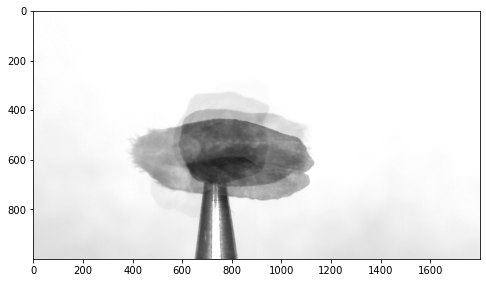

In [439]:
fig, ax = plt.subplots(1,1, figsize = (8, 8))
for i in range(10):
    img = images[i]
    ax.imshow(img, cmap='gray', alpha=0.5)

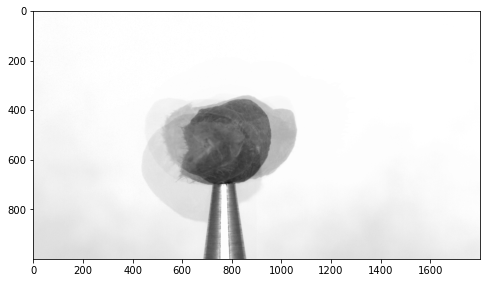

In [451]:
fig, ax = plt.subplots(1,1, figsize = (8, 8))
for i in range(200):
#     img = images[i]
    ax.imshow(images[i], cmap='gray', alpha=0.5)

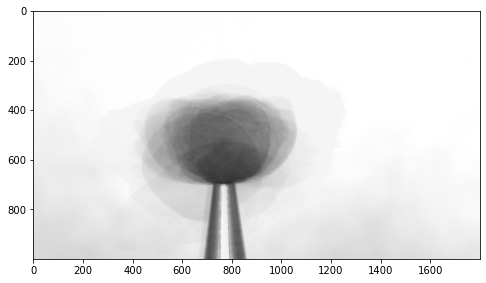

In [452]:
fig, ax = plt.subplots(1,1, figsize = (8, 8))
for i in range(200):
#     img = images[i]
    ax.imshow(images[i], cmap='gray', alpha=0.1)

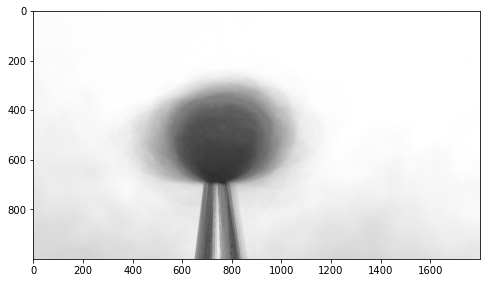

In [453]:
fig, ax = plt.subplots(1,1, figsize = (8, 8))
for i in range(200):
#     img = images[i]
    ax.imshow(images[i], cmap='gray', alpha=0.01)

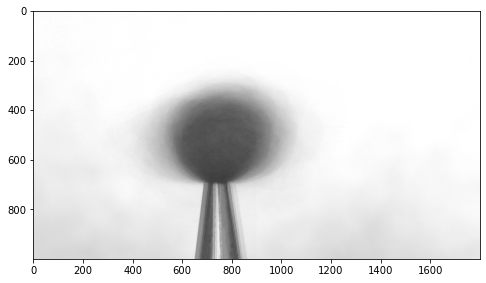

In [454]:
fig, ax = plt.subplots(1,1, figsize = (8, 8))
for i in range(200):
#     img = images[i]
    ax.imshow(images[i], cmap='gray', alpha=0.005)


In [455]:
fig.savefig(sf('figs'))

In [458]:
import torch as t

In [459]:
outputs = t.zeros(10,4,500)

In [467]:
prmatw = t.rand(100,36,4,4)

In [468]:
prmat = t.rand(10,36,4,4)

In [469]:
outputs = t.einsum('ijk,ijn->ikn', outputs,
    t.einsum('ij, kij-> kij',
    torch.linalg.inv(prmatw[0,0,:,:]), prmat[:,0,:,:]))

In [479]:
def forwardproj(pcd, pr):
    pcd2 = np.concatenate((pcd, np.expand_dims(np.repeat(1, pcd.shape[0]), axis = 1)), axis=1)
    pcd2 = np.matmul(pcd2,pr.T)
    pcd2 = pcd2/np.repeat(np.expand_dims(pcd2[:,3], axis=1), 4, axis = 1)
    return(pcd2[:,:3])

In [480]:
flname = '1484737/1494452'
pcd = np.asarray(open3d.io.read_point_cloud('C:/cherepashkin1/phenoseed/598/'+flname+'_Surface.ply').points)

In [483]:
dif1 = np.abs(forwardproj(pcd, bigm2[0,0,:,:])-forwardproj(pcd, bigm2[2403,0,:,:]))

In [501]:
np.mean((forwardproj(pcd, bigm2[0,0,:,:])-forwardproj(pcd, bigm2[1,0,:,:])), axis=0)

array([0.23318781, 0.        , 0.        ])

In [502]:
dif3 = [np.max((forwardproj(pcd, bigm2[0,0,:,:])-forwardproj(pcd, bigm2[i,0,:,:])),axis=0) for i in range(bigm2.shape[0])]

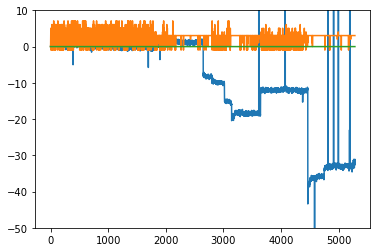

In [510]:
plt.plot(dif3)
plt.ylim(-50,10)
plt.savefig(sf('figs'))

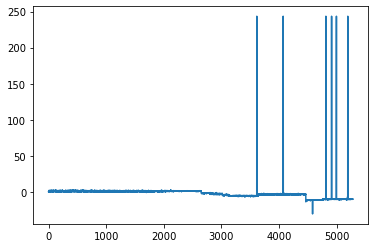

In [497]:
plt.plot(dif3)

In [486]:
dif1.shape

(36328, 3)

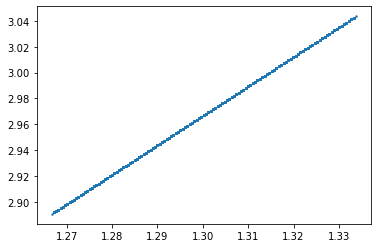

In [490]:
plt.scatter(dif1[:,0], dif1[:,1], s=2)
plt.savefig(sf('figs'))

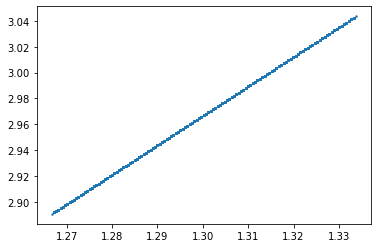

In [494]:
plt.scatter(dif2[:,0], dif2[:,1], s=2)
plt.savefig(sf('figs'))

In [511]:
cip3 = []
for root, structure, files in os.walk('C:/cherepashkin1/phenoseed/598'):
    for file in files:
        if 'Surface.ply' in file:
            cip3.append(os.path.join(root,file))

In [513]:
dif3.shape

(3,)

In [515]:
dif4 = np.zeros([len(cip3),3])
for i in range(len(cip3)):
    pcdi = np.asarray(open3d.io.read_point_cloud(cip3[i]).points)
    dif4[i] = np.max((forwardproj(pcdi, bigm2[0,0,:,:])-forwardproj(pcdi, bigm2[i,0,:,:])),axis=0)  

In [518]:
dif4.shape

(5283, 3)

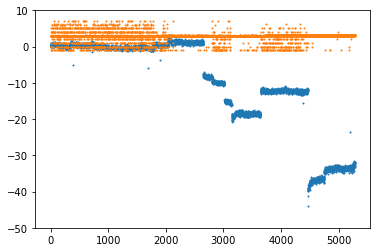

In [523]:
plt.scatter(np.arange(dif4.shape[0]),dif4[:,0], s=1)
plt.scatter(np.arange(dif4.shape[0]),dif4[:,1], s=1)
# plt.scatter(np.arange(dif4.shape[0]),dif4[:,2], s=1)
plt.ylim(-50,10)
plt.savefig(sf('figs'))

In [502]:
dif3 = [np.max((forwardproj(pcd, bigm2[0,0,:,:])-forwardproj(pcd, bigm2[i,0,:,:])),axis=0) for i in range(bigm2.shape[0])]

In [524]:
bigm2.shape

(5283, 36, 4, 4)

In [532]:
bigm5 = t.Tensor(bigm3)

In [533]:
bigm5.element_size() * bigm5.nelement()/1024**2

11.608154296875

In [ ]:
torch.linalg.inv(bigm5)

In [536]:
linalg.inv(bigm3[0,0,:,:])

array([[ 1.35063838e-03,  0.00000000e+00, -1.21557454e+00,
         9.98217522e+01],
       [ 0.00000000e+00,  1.35063838e-03, -7.23942171e-01,
         4.62120921e+01],
       [-0.00000000e+00, -0.00000000e+00, -1.96923077e+01,
        -2.38276923e+03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [537]:
np.array([[ 1.35063838e-03,  0.00000000e+00, -1.21557454e+00,
         9.98217522e+01],
       [ 0.00000000e+00,  1.35063838e-03, -7.23942171e-01,
         4.62120921e+01],
       [-0.00000000e+00, -0.00000000e+00, -1.96923077e+01,
        -2.38276923e+03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

array([[ 1.35063838e-03,  0.00000000e+00, -1.21557454e+00,
         9.98217522e+01],
       [ 0.00000000e+00,  1.35063838e-03, -7.23942171e-01,
         4.62120921e+01],
       [-0.00000000e+00, -0.00000000e+00, -1.96923077e+01,
        -2.38276923e+03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

# check that for other rotation angles, correction is the same

In [545]:
bigm3.shape

(5283, 36, 4, 4)

In [542]:
dif5 = np.einsum('jkn, ijkn -> ijkn', linalg.inv(bigm3[0,:,:,:]), bigm3)

In [1146]:
dif7 = np.einsum('kn, ikn -> ikn', linalg.inv(bigm3[0,0,:,:]), bigm3[:,0,:,:])

In [1142]:
dif5 = np.einsum('jkn, ijkn -> ijkn', linalg.inv(bigm3[0,:,:,:]), bigm3)

In [1143]:
dif5.shape

(5283, 36, 4, 4)

In [1147]:
dif7.shape

(5283, 4, 4)

In [1148]:
dif7[0]

array([[ 1.00000000e+00,  0.00000000e+00,  5.55555552e+01,
        -1.82481240e+07],
       [ 0.00000000e+00,  1.00000000e+00,  1.97048010e+01,
        -4.57827818e+06],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         2.88315077e+05],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [1145]:
bigm3[0,0,:,:]

array([[ 7.4039063e+02,  0.0000000e+00, -4.5703125e+01, -1.8280709e+05],
       [ 0.0000000e+00,  7.4039063e+02, -2.7218750e+01, -9.9071000e+04],
       [ 0.0000000e+00,  0.0000000e+00, -5.0781250e-02, -1.2100000e+02],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  1.0000000e+00]])

In [1144]:
dif5[0,0,:,:]

array([[ 1.00000000e+00,  0.00000000e+00,  5.55555552e+01,
        -1.82481240e+07],
       [ 0.00000000e+00,  1.00000000e+00,  1.97048010e+01,
        -4.57827818e+06],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         2.88315077e+05],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [550]:
dif7[0]

array([[ 1.00000000e+00,  0.00000000e+00,  5.55555552e+01,
        -1.82481240e+07],
       [ 0.00000000e+00,  1.00000000e+00,  1.97048010e+01,
        -4.57827818e+06],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         2.88315077e+05],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [551]:
dif6[0]

array([[ 1.00000000e+00,  0.00000000e+00, -4.33680869e-18,
        -1.42108547e-14],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [547]:
dif6 = [np.matmul(linalg.inv(bigm3[0,0,:,:]), bigm3[i,0,:,:]) for i in range(bigm3.shape[0])]

In [553]:
np.matmul(linalg.inv(bigm3[0,0,:,:]), bigm3[0,0,:,:])

array([[ 1.00000000e+00,  0.00000000e+00, -4.33680869e-18,
        -1.42108547e-14],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [1150]:
dif8 = np.einsum('mij, nmjk->nmik',linalg.inv(bigm3[0,:,:,:]), bigm3)

In [1151]:
dif8.shape

(5283, 36, 4, 4)

In [1153]:
dif8[1,0,:,:]

array([[ 1.00000000e+00,  0.00000000e+00, -6.93889390e-18,
         4.06407088e-02],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

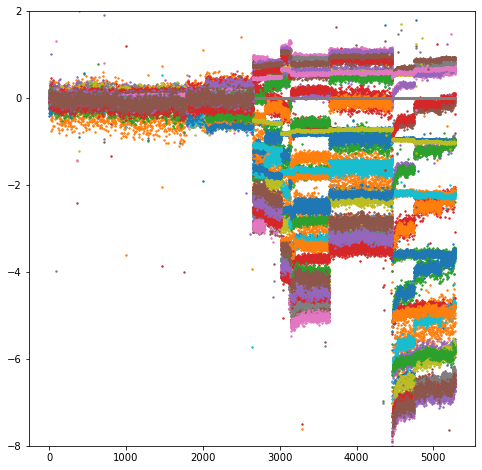

In [581]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
for i in range(36):
    ax.scatter(np.arange(dif8.shape[0]),dif8[:,i,0,3], s=2)
ax.set_ylim(-8,2)
sf(fig, 'figs')
# plt.ylim([-20,20])

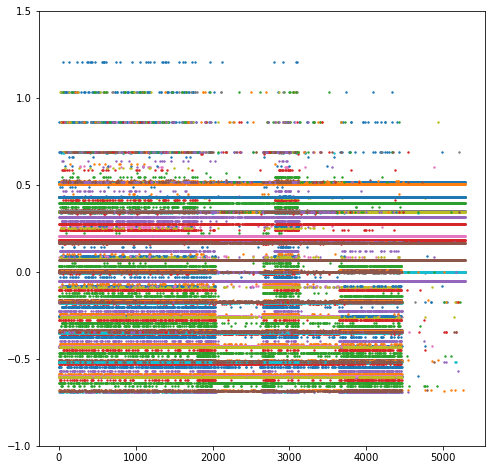

In [594]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
for i in range(36):
    ax.scatter(np.arange(dif8.shape[0]),dif8[:,i,1,3], s=2)
ax.set_ylim(-1,1.5)
sf(fig, 'figs')
# plt.ylim([-20,20])

In [564]:
dif8[0,0,1,3]

0.0

In [565]:
dif8[1,0,:,:]

array([[ 1.00000000e+00,  0.00000000e+00, -6.93889390e-18,
         4.06407088e-02],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [543]:
dif5[0,0,:,:]

array([[ 1.00000000e+00,  0.00000000e+00,  5.55555552e+01,
        -1.82481240e+07],
       [ 0.00000000e+00,  1.00000000e+00,  1.97048010e+01,
        -4.57827818e+06],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         2.88315077e+05],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [544]:
np.matmul(linalg.inv(bigm3[0,0,:,:]), bigm3[0,0,:,:])

array([[ 1.00000000e+00,  0.00000000e+00, -4.33680869e-18,
        -1.42108547e-14],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

## add rotation into consideration

In [557]:
dif8 = np.einsum('mij, nmjk, ->nmik',linalg.inv(bigm3[0,:,:,:]), bigm3, )

In [557]:
dif8 = np.einsum('ij, jk, kn ->in',linalg.inv(bigm3[0,0,:,:]), bigm3[1,0,:,:], bigm3[1,0,:,:])

In [595]:
a = np.zeros([2,2])

In [596]:
np.einsum('ij,jk,kn->in', a,a,a)

array([[0., 0.],
       [0., 0.]])

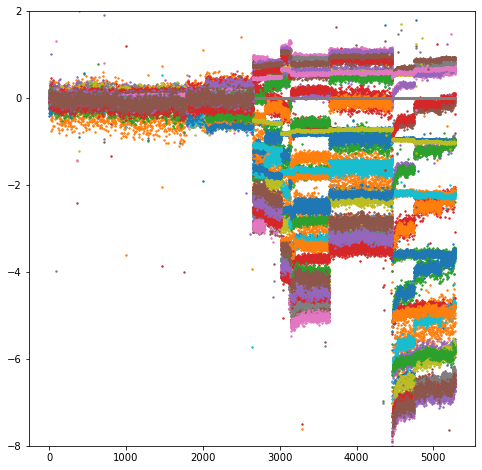

In [581]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
for i in range(36):
    ax.scatter(np.arange(dif8.shape[0]),dif8[:,i,0,3], s=2)
ax.set_ylim(-8,2)
sf(fig, 'figs')
# plt.ylim([-20,20])

In [597]:
dif8[:,i,0,3]-dif8[:,0,0,3]

array([-2.84217094e-14,  4.06407088e-02,  5.17834754e-02, ...,
       -5.66325373e+00, -5.55513513e+00, -5.66960173e+00])

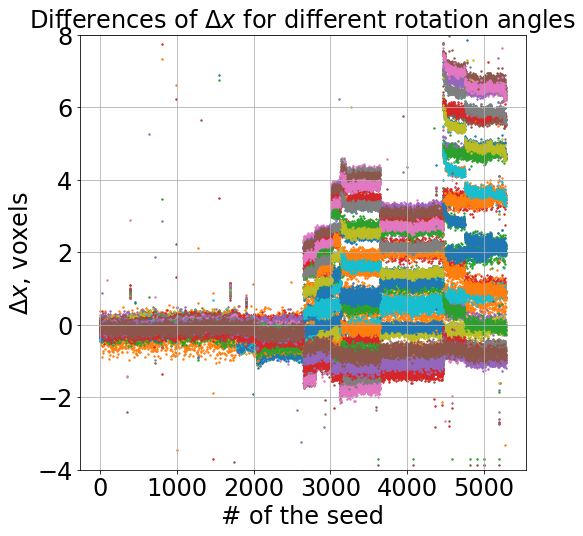

In [626]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
for i in range(36):
    ax.scatter(np.arange(dif8.shape[0]),dif8[:,i,0,3]-dif8[:,0,0,3], s=2)
ax.set_ylim(-4,8)
ax.set_title('Differences of $\Delta x$ for different rotation angles', fontsize=24)
ax.set_xlabel('# of the seed', fontsize=24)
ax.set_ylabel('$\Delta x$, voxels', fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=24)
ax.grid()
# sf(fig, 'figs')
# plt.ylim([-20,20])

# draw a circle of camera centres in 2d

In [ ]:
centre = bigm[0,0,:,:]

In [637]:
centres = np.zeros([36,3])
# print(bigm2[0,0,:3,:3].shape)
# linalg.inv(bigm2[0,0,4*i:4*(i+1)-1,:3])
for i in range(36):
#     print(4*i,4*(i+1)-1)
    centres[i,:] = -np.matmul(linalg.inv(bigm2[0,i,:3,:3]),bigm2[0,0,:3,3])

In [638]:
centres[0]

array([   99.8217522 ,    46.21209212, -2382.76923077])

In [642]:
centres2 = -np.einsum('ijk,ik', linalg.inv(bigm2[0,:,:3,:3]),bigm2[0,:,:3,3])

In [651]:
centres2 = -np.einsum('nijk,nik->nij', linalg.inv(bigm2[:,:,:3,:3]),bigm2[:,:,:3,3])

In [652]:
centres2.shape

(5283, 36, 3)

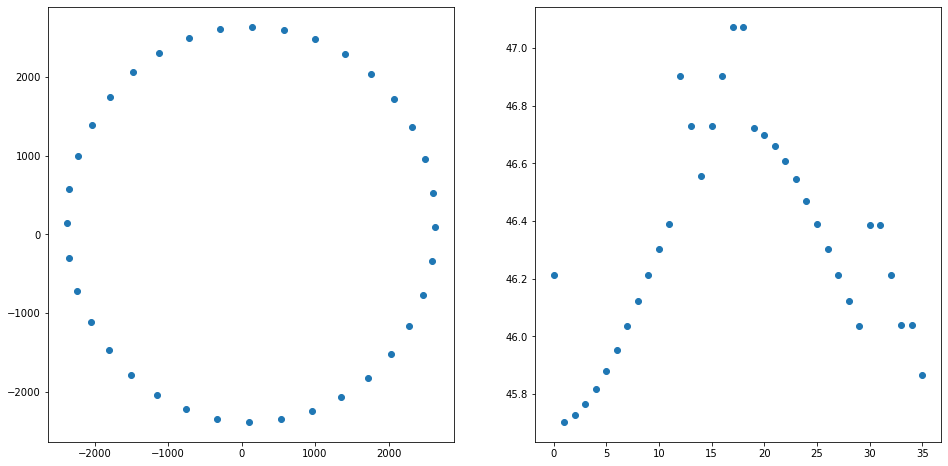

In [658]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].scatter(centres2[0,:,0], centres2[0,:,2])
ax[1].scatter(np.arange(36), centres2[0,:,1])

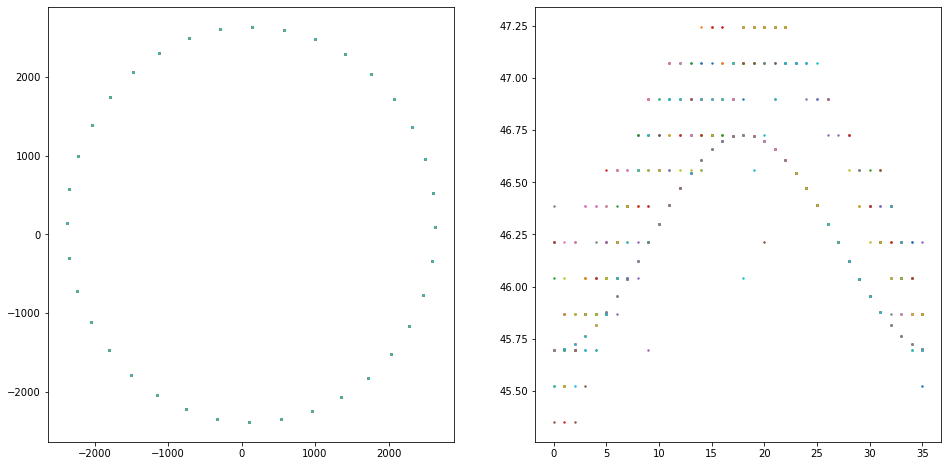

In [663]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
for i in range(20):
    ax[0].scatter(centres2[i,:,0], centres2[i,:,2], s=2)
    ax[1].scatter(np.arange(36), centres2[i,:,1], s=2)

In [ ]:
plt.plot()

In [667]:
dif8 = (centres2[:,:,0]-centres2[0,:,0])

In [712]:
dif8.shape

(5283, 36)

In [808]:
import numpy.ma as ma

In [810]:
mask0 = [0]*dif8.shape[0]

In [813]:
for i in range(dif8.shape[0]):
    for j in out3:
        if i == j:
            mask0[i] = 1
        

In [815]:
np.sum(np.array(mask0))

16

In [817]:
mx = ma.masked_array(dif8, mask=np.repeat(np.array(mask0),dif8.shape[1]))

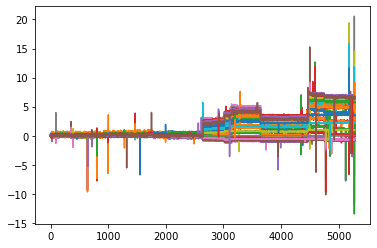

In [818]:
_ = plt.plot(mx)

In [819]:
mx.shape

(5283, 36)

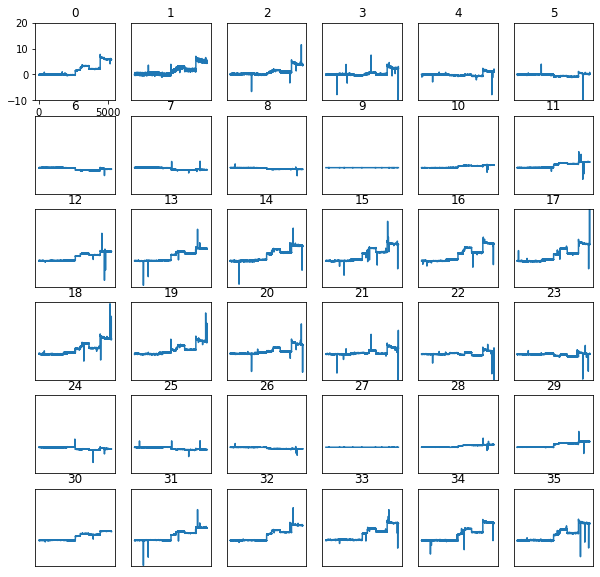

In [832]:
fig, ax = plt.subplots(6,6, figsize=(10,10))
for i in range(36):
    ax0 = ax[i//6,i%6]
    ax0.plot(mx[:,i])
    ax0.set_ylim(-10,20)
#     _ = ax0.axis('off')
    ax0.set_title(i)
    if i:
        
        ax0.set_xticks([])
        ax0.set_yticks([])
sf(fig, 'figs')
# fig.subplots_adjust(left=0.125,
#                     bottom=0.1, 
#                     right=0.9, 
#                     top=0.9, 
#                     wspace=0, 
#                     hspace=0)
    

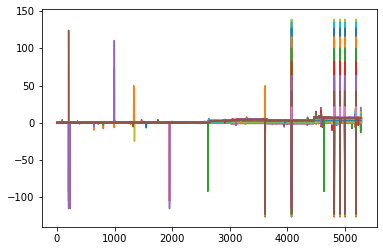

In [713]:
_ = plt.plot(dif8)

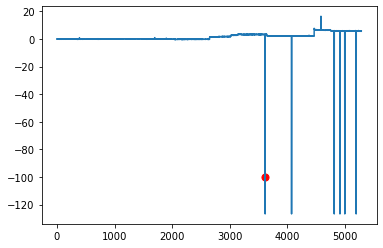

In [719]:
plt.plot(dif8[:,0])
plt.scatter(3614, -100, s=50, c = 'r')

In [722]:
centres2[0,0,:]

array([   99.8217522 ,    46.21209212, -2382.76923077])

In [721]:
centres2[3614,0,:]

array([  -26.9857548 ,    45.69547294, -2382.76923077])

In [671]:
ar = dif8[:,0]

In [727]:
out2 = []
for i in range(36):
    out2 = out2 + outliers(dif8[:,i])
#     print(outliers(dif8[:,i]))

In [736]:
out3 = (list(set(out2)))

In [740]:
out3.sort()

In [741]:
print(out3)

[203, 226, 996, 1333, 1346, 1954, 2619, 3614, 4072, 4582, 4636, 4813, 4912, 4995, 4996, 5193]


In [673]:
np.where(np.abs(ar-np.mean(ar)) > 6*np.std(ar))

(array([3614, 4072, 4813, 4912, 4995, 4996, 5193], dtype=int64),)

In [723]:
def outliers(ar):
    return(list(np.where(np.abs(ar-np.mean(ar)) > 6*np.std(ar))[0]))

In [687]:
outl0 = [cip2[i] for i in list(np.where(np.abs(ar-np.mean(ar)) > 6*np.std(ar))[0])]

In [690]:
outl0[0].split('\\')[1]+'_'+outl0[0].split('\\')[2]

'1484747_1496732'

In [711]:
[cip2[i] for i in list(np.where(np.abs(ar-np.mean(ar)) > 6*np.std(ar))[0])]

['C:/cherepashkin1/phenoseed/598\\1484747\\1496732\\rotation_000.tif',
 'C:/cherepashkin1/phenoseed/598\\1484750\\1499558\\rotation_000.tif',
 'C:/cherepashkin1/phenoseed/598\\1484757\\1500370\\rotation_000.tif',
 'C:/cherepashkin1/phenoseed/598\\1484757\\1500470\\rotation_000.tif',
 'C:/cherepashkin1/phenoseed/598\\1484758\\1500557\\rotation_000.tif',
 'C:/cherepashkin1/phenoseed/598\\1484758\\1500558\\rotation_000.tif',
 'C:/cherepashkin1/phenoseed/598\\1484760\\1500768\\rotation_000.tif']

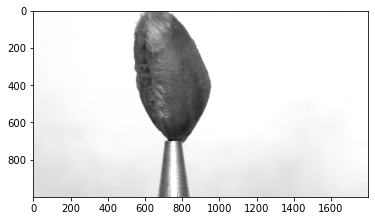

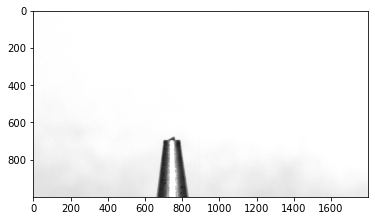

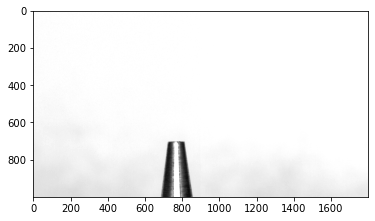

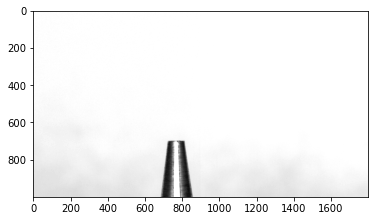

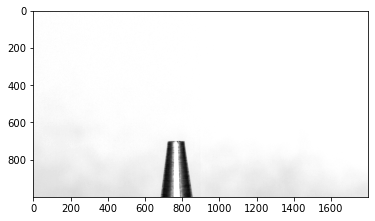

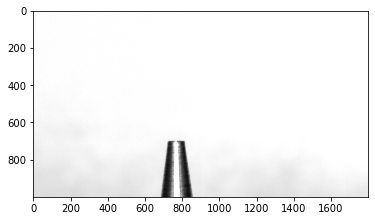

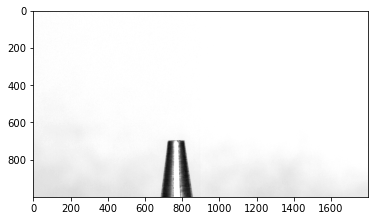

In [685]:
# fig, ax = plt.subplots()
for j in [cip2[i] for i in list(np.where(np.abs(ar-np.mean(ar)) > 6*np.std(ar))[0])]:
    image0 = img = np.asarray(io.imread(j))
    plt.figure()
    plt.imshow(image0, cmap='gray')

In [743]:
len(out3)

16

In [754]:
cip2[0].split('\\')[1]+'_'+cip2[0].split('\\')[2]

'1484717_1491988'

In [793]:
el1 = [cip2[i] for i in out3]

In [806]:
el2 = [j.split('\\')[1]+'/'+j.split('\\')[2] for j in el1]

In [807]:
for i in el2:
    print(i)

1484718/1492192
1484718/1492215
1484725/1493002
1484728/1493340
1484728/1493353
1484733/1494000
1484738/1494678
1484747/1496732
1484750/1499558
1484755/1500131
1484755/1500188
1484757/1500370
1484757/1500470
1484758/1500557
1484758/1500558
1484760/1500768


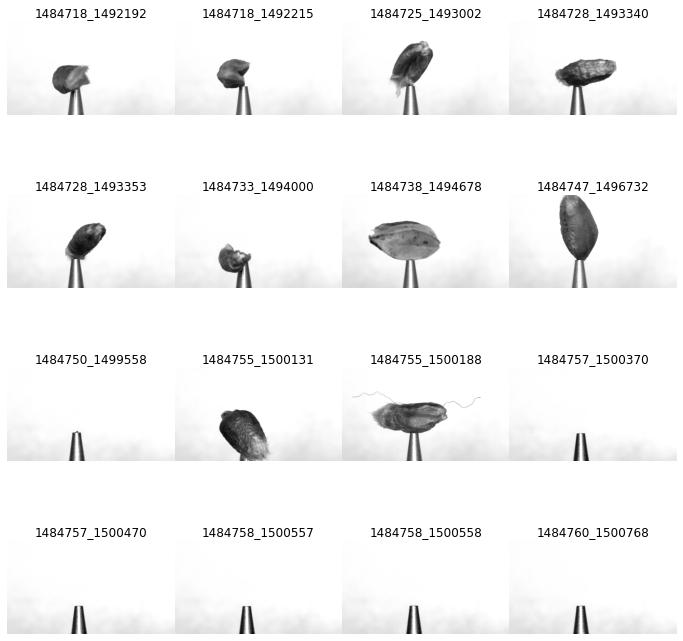

In [757]:
fig, ax = plt.subplots(4,4,figsize=(12,12))
for i,j in enumerate([cip2[i] for i in out3]):
    image0 = img = np.asarray(io.imread(j))
    ax[i//4,i%4].imshow(image0, cmap='gray')
    _ = ax[i//4,i%4].axis('off')
    ax[i//4,i%4].set_title(j.split('\\')[1]+'_'+j.split('\\')[2])
fig.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0, 
                    hspace=0)
sf(fig,'figs')

In [ ]:
np.concatenate((a,np.where(np.abs(ar-np.mean(ar)) > 6*np.std(ar))[0]))

In [692]:
exceptions[0]

'1484755/1500207\n'

In [704]:
exceptions2[0]

'1484755/1500207'

In [707]:
exceptions2.index('1484747/1496732')

ValueError: '1484747/1496732' is not in list

In [709]:
with open('C:/circles/finetune_test/598_exceptions.txt', 'r') as f:
    exceptions = f.readlines()
exceptions2 = [exceptions[i].replace('\n','') for i in range(len(exceptions))]

In [710]:
for i in [outl0[i].split('\\')[1]+'/'+outl0[i].split('\\')[2]+'\n' for i in range(len(outl0))]:
    try:
#         print(outl0[0].split('\\')[1]+'/'+outl0[0].split('\\')[2])
        exceptions2.index(outl0[0].split('\\')[1]+'/'+outl0[0].split('\\')[2])
        print(i)
    except:
        pass

1484747/1496732

1484750/1499558

1484757/1500370

1484757/1500470

1484758/1500557

1484758/1500558

1484760/1500768



In [697]:
outl0

['C:/cherepashkin1/phenoseed/598\\1484747\\1496732\\rotation_000.tif',
 'C:/cherepashkin1/phenoseed/598\\1484750\\1499558\\rotation_000.tif',
 'C:/cherepashkin1/phenoseed/598\\1484757\\1500370\\rotation_000.tif',
 'C:/cherepashkin1/phenoseed/598\\1484757\\1500470\\rotation_000.tif',
 'C:/cherepashkin1/phenoseed/598\\1484758\\1500557\\rotation_000.tif',
 'C:/cherepashkin1/phenoseed/598\\1484758\\1500558\\rotation_000.tif',
 'C:/cherepashkin1/phenoseed/598\\1484760\\1500768\\rotation_000.tif']

# describe exceptions

In [761]:
with open('C:/circles/finetune_test/598_exceptions_good.txt', 'r') as f:
    good = f.readlines()

In [764]:
good[0]

'1496708\n'

In [767]:
exceptions[1]

'1484746/1496708\n'

In [777]:
len([ x for x in exceptions_list if good[0] not in x ])

83

In [779]:
exception_list = exceptions


In [780]:
for g in good:
    exception_list = [ x for x in exception_list if g not in x ]

In [ ]:
for g in good:
    for x in exceptions:
        if g not in x:
            

In [781]:
len(exception_list)

74

In [782]:
len(good)

11

In [775]:
len(exceptions)

84

In [783]:
exception_list[0]

'1484755/1500207\n'

In [784]:
el0 = ['C:/cherepashkin1/phenoseed/598/'+i.replace('\n', '')+'/rotation_000.tif' for i in exception_list]

In [786]:
el0[0]

'C:/cherepashkin1/phenoseed/598/1484755/1500207/rotation_000.tif'

In [790]:
len(el0)

74

IndexError: list index out of range

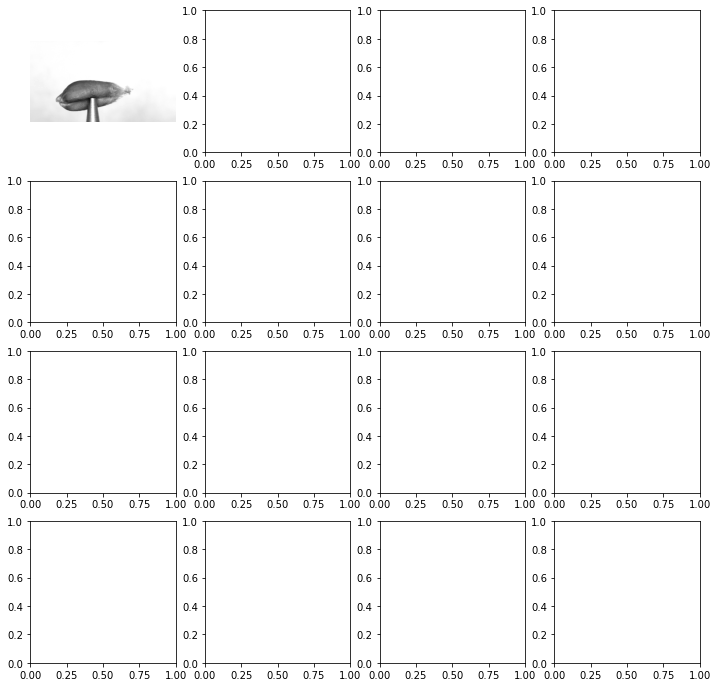

In [789]:
fig, ax = plt.subplots(4,4,figsize=(12,12))
for i,j in enumerate(el0[:15]):
    image0 = img = np.asarray(io.imread(j))
    ax[i//4,i%4].imshow(image0, cmap='gray')
    _ = ax[i//4,i%4].axis('off')
    ax[i//4,i%4].set_title(j.split('\\')[1]+'_'+j.split('\\')[2])
fig.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0, 
                    hspace=0)
# sf(fig,'figs')

# estimate that circle is not precise for the basis seed

In [834]:
centres2.shape

(5283, 36, 3)

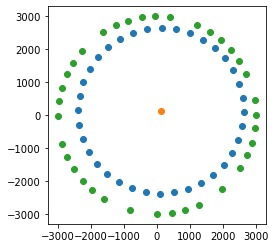

In [846]:
fig, ax = plt.subplots(1,1)
ax.scatter(centres2[0,:,0], centres2[0,:,2])
ax.set_aspect('equal', adjustable='box')
ax.scatter(np.mean(centres2[0,:,0]),np.mean(centres2[0,:,2]))
ax.scatter(3000*np.cos(np.arange(36)), 3000*np.sin(np.arange(36)))

In [838]:
np.mean(centres2[0,:,0])

124.83102095751107

In [839]:
np.mean(centres2[0,:,2])

122.41775974817824

# analyze how is center of circle of camera centers moving

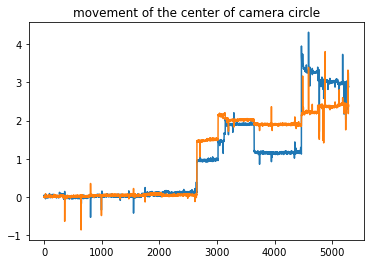

In [862]:
fig = plt.figure()
plt.plot(np.mean(centres2m[:,:,0], axis=1)-np.mean(centres2m[0,:,0]))
plt.plot(np.mean(centres2m[:,:,2], axis=1)-np.mean(centres2m[0,:,2]))
plt.title('movement of the center of camera circle')
sf(fig, 'figs')

In [851]:
centres2.shape

(5283, 36, 3)

In [852]:
mask1 = np.expand_dims(mask0, axis=(1,2))

In [853]:
mask1.shape

(5283, 1, 1)

In [883]:
centres2m = ma.masked_array(centres2, mask=np.repeat(np.repeat(mask1,centres2.shape[1]),centres2.shape[2]))

In [855]:
centres2m.shape

(5283, 36, 3)

In [885]:
np.vstack((centres2m[0,:,0], centres2m[0,:,2]))

masked_array(
  data=[[   99.8217522 ,  -334.76735776,  -753.25536961, -1146.03432265,
         -1500.96377099, -1806.83912462, -2054.28864504, -2236.0249015 ,
         -2346.64842251, -2382.76923077, -2342.85483907, -2228.0467263 ,
         -2041.66527081, -1789.11846426, -1477.76286338, -1117.38766046,
          -718.81274719,  -294.01397373,   143.82773996,   581.39461415,
          1005.16659272,  1402.30051902,  1760.28242267,  2068.26181196,
          2316.54875632,  2497.87620044,  2606.25362566,  2638.76923077,
          2594.61734686,  2475.33391732,  2284.77833336,  2028.80917254,
          1715.58482675,  1354.37813923,   956.86248465,   534.30295852],
        [-2382.76923077, -2339.90362783, -2223.15389157, -2035.62239103,
         -1782.71363092, -1472.21212749, -1113.70342198,  -717.89255883,
          -296.51572591,   139.15535411,   574.02949784,   995.81231472,
          1391.56774775,  1749.33080753,  2058.18155103,  2308.16131324,
          2491.68988914,  2603.08953

In [892]:
centers3 = np.concatenate((centres2m[:,:,0],centres2m[:,:,2]), axis=2)

AxisError: axis 2 is out of bounds for array of dimension 2

In [900]:
centres3 = np.copy(centres2)

In [901]:
centres3.shape

(5283, 36, 3)

In [904]:
centres3 = np.delete(centres3, 1,2)

In [891]:
centers3.shape

(5283, 72)

In [907]:
np.array(mask0).shape

(5283,)

In [908]:
np.array(mask1).shape

(5283, 1, 1)

In [910]:
centres3m = ma.masked_array(centres3, mask=np.repeat(np.repeat(mask1,centres3.shape[1]),centres3.shape[2]))

In [876]:
radi0 = [np.mean(linalg.norm(np.vstack((centres2m[i,:,0], centres2m[i,:,2])),axis=0)) for i in range(centres2m.shape[0])]

Text(0.5, 1.0, 'movement of the center of camera circle')

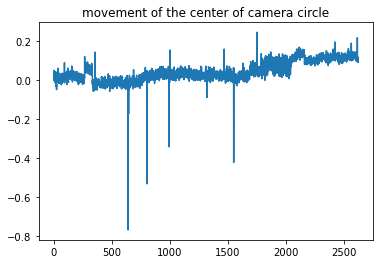

In [945]:
fig = plt.figure()
plt.plot(np.mean(centres2m[:2625,:,0], axis=1)-np.mean(centres2m[0,:,0]))
# plt.plot(np.mean(centres2m[:2500,:,2], axis=1)-np.mean(centres2m[0,:,2]))
plt.title('movement of the center of camera circle')
# sf(fig, 'figs')

In [912]:
centres3m.shape

(5283, 36, 2)

In [928]:
linalg.norm(centres3m[0,:,:],axis=1).shape

(36,)

In [931]:
np.mean(linalg.norm(centres3m[0,:,:],axis=1), axis=0)

2513.7003806547054

In [917]:
np.mean(linalg.norm(centres3m,axis=2), axis=1).shape

(5283,)

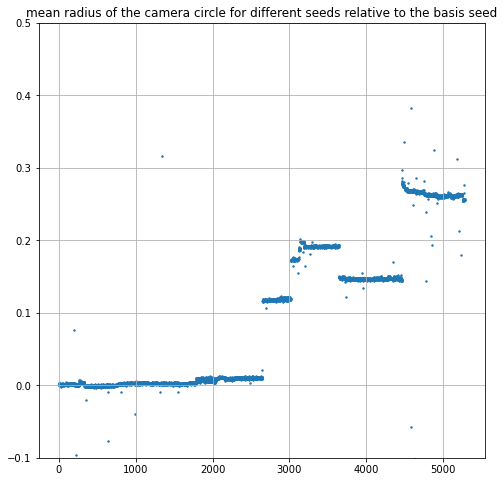

In [940]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.scatter(np.arange(centres3m.shape[0]),np.mean(linalg.norm(centres3m,axis=2), axis=1)-np.mean(linalg.norm(centres3m[0,:,:],axis=1), axis=0), s=2)
# plt.plot(np.mean(centres2m[:,:,2], axis=1)-np.mean(centres2m[0,:,2]))
ax.grid('on')
ax.set_ylim(-0.1, 0.5)
plt.title('mean radius of the camera circle for different seeds relative to the basis seed')
sf(fig, 'figs')

In [881]:
outliers(radi0)

[3614, 4072, 4813, 4912, 4995, 4996, 5193]

In [882]:
out3

[203,
 226,
 996,
 1333,
 1346,
 1954,
 2619,
 3614,
 4072,
 4582,
 4636,
 4813,
 4912,
 4995,
 4996,
 5193]

In [947]:
a = np.zeros(100)

In [949]:
a[:200].shape

(100,)

# central crop test

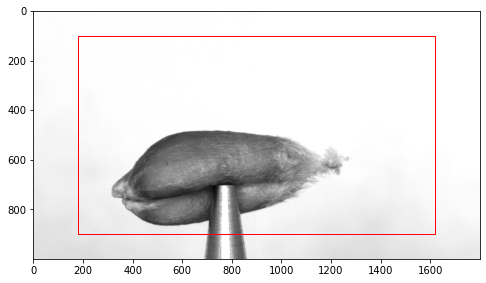

In [964]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
new_w = 800
new_h = int(new_w*1.8)
w, h = 1000, 1800
ax.imshow(img, cmap='gray')
ax.add_patch(patches.Rectangle(((h-new_h)//2, (w-new_w)//2), new_h, new_w, linewidth=1, edgecolor='r', facecolor='none'))


In [966]:
img.shape

(1000, 1800)

In [965]:
img2 = np.zeros([10, 1000, 1800])

In [967]:
newi2 = img2[:,(w-new_w)//2:(w+new_w)//2,(h-new_h)//2:(h+new_h)//2]

In [968]:
newi2.shape

(10, 800, 1440)

In [971]:
new_w = 801
new_h = int(new_w*1.8)
w, h = 1000, 1800
(w-new_w)/2+


99.5

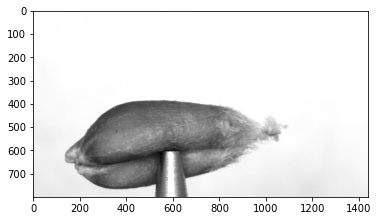

In [956]:
new_w = 800
new_h = int(new_w*1.8)
w, h = 1000, 1800

newi = img[(w-new_w)//2:(w+new_w)//2,(h-new_h)//2:(h+new_h)//2]
plt.imshow(newi, cmap='gray')

In [ ]:
# img = np.squeeze(255-image[i])
img
properties = regionprops(
    (img > filters.threshold_otsu(img)).astype(int), img)
cms = tuple(map(lambda x: int(x), properties[0].centroid))
tempa = (img[cms[0] - new_h//2: cms[0] + new_h//2,
         cms[1] - new_w//2: cms[1] + new_w//2]).astype(np.uint8)
padh = (new_h-tempa.shape[0])//2
padw = (new_w-tempa.shape[1])//2
tempb = np.pad(
    tempa, ((padh, new_h-tempa.shape[0]-padh),
            (padw, new_w-tempa.shape[1]-padw)),
    mode='constant', constant_values=0)

In [ ]:
for root, structure, files in os.walk('C:/cherepashkin1/phenoseed/598'):
    for file in files:
        if 'Surface.ply' in file:
            mass = np.asarray(open3d.io.read_point_cloud(img_name).points)
            bigm[i,:,:] = prmatread(os.path.join(root, file))
            i+=1

# write masses to csv

In [973]:
import pandas as pd

In [974]:
df1 = pd.read_csv('C:/cherepashkin1/phenoseed_csv/pathes_to_598.csv')

In [979]:
df1

,file_name,zero_angle
0,598csv/1484720/1492412,7
1,598csv/1484719/1492243,14
2,598csv/1484738/1494635,13
3,598csv/1484755/1500157,6
4,598csv/1484738/1494634,8
...,...,...
5265,598csv/1484734/1494120,23
5266,598csv/1484719/1492267,13
5267,598csv/1484756/1500240,20
5268,598csv/1484752/1499783,24


In [1106]:
fn = df1.loc[:,"file_name"].values.tolist()

In [990]:
fn[0]

'598csv/1484720/1492412'

In [988]:
za = df1.loc[:,"zero_angle"].values.tolist()

In [991]:
za2 = [0]*len(cip2)

In [992]:
cip2[0]

'C:/cherepashkin1/phenoseed/598\\1484717\\1491988\\rotation_000.tif'

In [995]:
fn.index('598csv/'+cip2[0].split('\\')[1]+'/'+cip2[0].split('\\')[2])

5105

In [999]:
z = float('nan')

In [1000]:
z

nan

In [1001]:
import math
x = float('nan')
math.isnan(x)

True

In [1107]:
for i in range(len(cip2)):
    try: 
        za2[i] = za[fn.index('598csv/'+cip2[i].split('\\')[1]+'/'+cip2[i].split('\\')[2])]
    except:
        za2[i] = 1000000
#     if '598csv/'+cip2[i].split('\\')[1]+'/'+cip2[i].split('\\')[2] in fn:
#         print()

In [1108]:
za2

[8,
 9,
 8,
 5,
 11,
 7,
 11,
 6,
 24,
 35,
 9,
 13,
 8,
 12,
 3,
 10,
 9,
 14,
 10,
 7,
 6,
 10,
 1,
 10,
 23,
 9,
 6,
 10,
 11,
 9,
 5,
 10,
 35,
 2,
 9,
 8,
 9,
 2,
 7,
 6,
 10,
 10,
 8,
 6,
 9,
 26,
 5,
 6,
 10,
 4,
 29,
 29,
 9,
 10,
 7,
 7,
 3,
 29,
 32,
 14,
 14,
 30,
 18,
 16,
 7,
 12,
 6,
 10,
 5,
 6,
 8,
 11,
 16,
 8,
 11,
 9,
 12,
 10,
 3,
 10,
 31,
 8,
 26,
 3,
 21,
 11,
 9,
 14,
 10,
 6,
 6,
 2,
 10,
 11,
 11,
 9,
 9,
 2,
 8,
 8,
 10,
 10,
 5,
 8,
 7,
 10,
 10,
 7,
 11,
 4,
 12,
 3,
 9,
 18,
 7,
 8,
 9,
 10,
 7,
 4,
 10,
 11,
 11,
 30,
 9,
 6,
 7,
 7,
 6,
 15,
 11,
 3,
 5,
 2,
 10,
 5,
 9,
 5,
 22,
 11,
 11,
 25,
 26,
 22,
 10,
 7,
 12,
 1,
 15,
 10,
 27,
 10,
 6,
 5,
 7,
 15,
 18,
 6,
 1,
 2,
 6,
 7,
 9,
 28,
 8,
 2,
 7,
 13,
 7,
 9,
 6,
 31,
 7,
 7,
 11,
 15,
 8,
 10,
 5,
 11,
 6,
 2,
 8,
 7,
 8,
 10,
 9,
 4,
 7,
 10,
 11,
 8,
 6,
 9,
 10,
 12,
 24,
 7,
 13,
 11,
 8,
 9,
 2,
 1000000,
 31,
 3,
 19,
 10,
 10,
 11,
 10,
 27,
 9,
 29,
 8,
 7,
 4,
 15,
 16,
 10,
 18,
 8,
 20

In [978]:
len(cip2)

5283

In [982]:
'598csv/'+cip2[0].split('\\')[1]+'/'+cip2[0].split('\\')[2]

'598csv/1484717/1491988'

In [983]:
lframe = pd.DataFrame()
lframe.insert(0, 'file_name', ['598csv/'+i.split('\\')[1]+'/'+i.split('\\')[2] for i in cip2])

In [1007]:
lframe.insert(1, 'zero_angle', [int(i) for i in za2])

ValueError: cannot convert float NaN to integer

ValueError: could not convert string to float: 'null'

In [1009]:
lframe

,file_name,zero_angle
0,598csv/1484717/1491988,8.0
1,598csv/1484717/1491989,9.0
2,598csv/1484717/1491990,8.0
3,598csv/1484717/1491991,5.0
4,598csv/1484717/1491992,11.0
...,...,...
5278,598csv/1484760/1500857,10.0
5279,598csv/1484760/1500858,22.0
5280,598csv/1484760/1500859,21.0
5281,598csv/1484760/1500860,21.0


In [1012]:
masses.shape

(5283, 3)

In [1013]:
lframe.insert(2, 'x_cms', masses[:,0])

In [1015]:
lframe.insert(3, 'y_cms', masses[:,1])

In [1016]:
lframe.insert(4, 'z_cms', masses[:,2])

In [1017]:
lframe

,file_name,zero_angle,x_cms,y_cms,z_cms
0,598csv/1484717/1491988,8.0,129.831987,43.936533,154.317130
1,598csv/1484717/1491989,9.0,119.950786,48.513970,141.181489
2,598csv/1484717/1491990,8.0,123.014476,47.128630,155.613687
3,598csv/1484717/1491991,5.0,120.352368,42.278210,136.717018
4,598csv/1484717/1491992,11.0,120.963969,52.290549,139.462856
...,...,...,...,...,...
5278,598csv/1484760/1500857,10.0,121.881008,24.875571,128.604963
5279,598csv/1484760/1500858,22.0,138.268651,47.324900,118.120206
5280,598csv/1484760/1500859,21.0,140.535355,24.351695,137.298298
5281,598csv/1484760/1500860,21.0,132.135006,52.008363,115.020311


In [1026]:
lframe.insert(5, 'delta_x', dt[:,0])
lframe.insert(6, 'delta_y', dt[:,1])

In [1027]:
lframe

,file_name,zero_angle,x_cms,y_cms,z_cms,delta_x,delta_y
0,598csv/1484717/1491988,8.0,129.831987,43.936533,154.317130,-1.421085e-14,0.000000
1,598csv/1484717/1491989,9.0,119.950786,48.513970,141.181489,4.064071e-02,0.000000
2,598csv/1484717/1491990,8.0,123.014476,47.128630,155.613687,5.178348e-02,0.516619
3,598csv/1484717/1491991,5.0,120.352368,42.278210,136.717018,3.207766e-02,0.516619
4,598csv/1484717/1491992,11.0,120.963969,52.290549,139.462856,7.131371e-03,0.688826
...,...,...,...,...,...,...,...
5278,598csv/1484760/1500857,10.0,121.881008,24.875571,128.604963,-5.848818e+00,0.516619
5279,598csv/1484760/1500858,22.0,138.268651,47.324900,118.120206,-5.682811e+00,0.516619
5280,598csv/1484760/1500859,21.0,140.535355,24.351695,137.298298,-5.663254e+00,0.516619
5281,598csv/1484760/1500860,21.0,132.135006,52.008363,115.020311,-5.555135e+00,0.516619


In [1028]:
lframe.to_csv('598frame.csv')

In [ ]:
mat = t.einsum('ij, kij-> kij',
    basisminv, prmat[:,0,:,:])
outputs = t.einsum('ijk,ijn->ikn', outputs, mat)

In [ ]:
dt = np.array([np.matmul(linalg.inv(bigm3[0,0,:,:]), bigm3[i,0,:,:])[:2,3] for i in range(bigm3.shape[0])])

In [1018]:
dt.shape

(5283, 3)

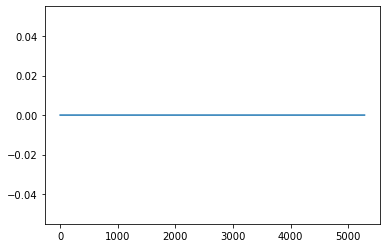

In [1025]:
plt.plot(dt[:,2])

In [1029]:
df2 = pd.read_csv('C:/cherepashkin1/phenoseed_csv/598frame.csv')

In [1033]:
df2= df2.rename({'Unnamed: 0': 'index'}, axis='columns')


In [1042]:
df2.to_csv('598frame.csv', index=False)

In [1043]:
df4 = pd.read_csv('598frame.csv')

In [1044]:
df4

,index,file_name,zero_angle,x_cms,y_cms,z_cms,delta_x,delta_y
0,0,598csv/1484717/1491988,8.0,129.831987,43.936533,154.317130,0.000000,0.000000
1,1,598csv/1484717/1491989,9.0,119.950786,48.513970,141.181489,0.040641,0.000000
2,2,598csv/1484717/1491990,8.0,123.014476,47.128630,155.613687,0.051783,0.516619
3,3,598csv/1484717/1491991,5.0,120.352368,42.278210,136.717018,0.032078,0.516619
4,4,598csv/1484717/1491992,11.0,120.963969,52.290549,139.462856,0.007131,0.688826
...,...,...,...,...,...,...,...,...
5278,5278,598csv/1484760/1500857,10.0,121.881008,24.875571,128.604963,-5.848818,0.516619
5279,5279,598csv/1484760/1500858,22.0,138.268651,47.324900,118.120206,-5.682811,0.516619
5280,5280,598csv/1484760/1500859,21.0,140.535355,24.351695,137.298298,-5.663254,0.516619
5281,5281,598csv/1484760/1500860,21.0,132.135006,52.008363,115.020311,-5.555135,0.516619


In [1034]:
df2

df3 = df2.sample(frac=1)

In [1040]:
df3

,index,file_name,zero_angle,x_cms,y_cms,z_cms,delta_x,delta_y
3391,3391,598csv/1484745/1496503,9.0,132.067716,48.915742,165.553134,-3.412563,0.516619
1674,1674,598csv/1484730/1493681,7.0,118.334241,55.316549,143.714213,-0.032172,0.516619
2790,2790,598csv/1484740/1494908,10.0,121.872092,69.410906,152.215932,-1.540241,0.516619
1292,1292,598csv/1484727/1493299,10.0,126.612728,51.617789,150.650905,-0.070530,0.861032
172,172,598csv/1484718/1492161,7.0,129.490853,47.877366,152.398788,-0.003701,0.516619
...,...,...,...,...,...,...,...,...
4248,4248,598csv/1484752/1499742,5.0,137.636605,52.365194,116.330753,-2.106955,0.344413
76,76,598csv/1484717/1492064,12.0,129.542148,41.442489,139.124832,0.078499,0.516619
846,846,598csv/1484724/1492852,13.0,130.883913,49.042024,138.460696,0.020543,0.516619
3968,3968,598csv/1484750/1499442,26.0,129.183662,51.209642,113.114981,-2.178458,0.172206


In [1050]:
df3.to_csv('1.csv')

In [1051]:
df5 = pd.read_csv('1.csv')

In [1052]:
df5

,Unnamed: 0,index,file_name,zero_angle,x_cms,y_cms,z_cms,delta_x,delta_y
0,3391,3391,598csv/1484745/1496503,9.0,132.067716,48.915742,165.553134,-3.412563,0.516619
1,1674,1674,598csv/1484730/1493681,7.0,118.334241,55.316549,143.714213,-0.032172,0.516619
2,2790,2790,598csv/1484740/1494908,10.0,121.872092,69.410906,152.215932,-1.540241,0.516619
3,1292,1292,598csv/1484727/1493299,10.0,126.612728,51.617789,150.650905,-0.070530,0.861032
4,172,172,598csv/1484718/1492161,7.0,129.490853,47.877366,152.398788,-0.003701,0.516619
...,...,...,...,...,...,...,...,...,...
5278,4248,4248,598csv/1484752/1499742,5.0,137.636605,52.365194,116.330753,-2.106955,0.344413
5279,76,76,598csv/1484717/1492064,12.0,129.542148,41.442489,139.124832,0.078499,0.516619
5280,846,846,598csv/1484724/1492852,13.0,130.883913,49.042024,138.460696,0.020543,0.516619
5281,3968,3968,598csv/1484750/1499442,26.0,129.183662,51.209642,113.114981,-2.178458,0.172206


In [1039]:
df3.iloc[0, 1]

'598csv/1484745/1496503'

In [1049]:
df3._get_value(3391, 'file_name')

'598csv/1484745/1496503'

In [1053]:
df3

,index,file_name,zero_angle,x_cms,y_cms,z_cms,delta_x,delta_y
3391,3391,598csv/1484745/1496503,9.0,132.067716,48.915742,165.553134,-3.412563,0.516619
1674,1674,598csv/1484730/1493681,7.0,118.334241,55.316549,143.714213,-0.032172,0.516619
2790,2790,598csv/1484740/1494908,10.0,121.872092,69.410906,152.215932,-1.540241,0.516619
1292,1292,598csv/1484727/1493299,10.0,126.612728,51.617789,150.650905,-0.070530,0.861032
172,172,598csv/1484718/1492161,7.0,129.490853,47.877366,152.398788,-0.003701,0.516619
...,...,...,...,...,...,...,...,...
4248,4248,598csv/1484752/1499742,5.0,137.636605,52.365194,116.330753,-2.106955,0.344413
76,76,598csv/1484717/1492064,12.0,129.542148,41.442489,139.124832,0.078499,0.516619
846,846,598csv/1484724/1492852,13.0,130.883913,49.042024,138.460696,0.020543,0.516619
3968,3968,598csv/1484750/1499442,26.0,129.183662,51.209642,113.114981,-2.178458,0.172206


In [1055]:
df3.loc[3391,'file_name']

'598csv/1484745/1496503'

In [1058]:
df3._get_value(3391,'file_name')

'598csv/1484745/1496503'

In [1061]:
print(df3.head())

      index               file_name  zero_angle       x_cms      y_cms  \
3391   3391  598csv/1484745/1496503         9.0  132.067716  48.915742   
1674   1674  598csv/1484730/1493681         7.0  118.334241  55.316549   
2790   2790  598csv/1484740/1494908        10.0  121.872092  69.410906   
1292   1292  598csv/1484727/1493299        10.0  126.612728  51.617789   
172     172  598csv/1484718/1492161         7.0  129.490853  47.877366   

           z_cms   delta_x   delta_y  
3391  165.553134 -3.412563  0.516619  
1674  143.714213 -0.032172  0.516619  
2790  152.215932 -1.540241  0.516619  
1292  150.650905 -0.070530  0.861032  
172   152.398788 -0.003701  0.516619  


In [1062]:
st = '1484745/1496503'
df3 = df3[~df3.file_name.str.contains(st.replace('\n', ''))]

In [1063]:
pd.read_csv('C:/cherepashkin1/phenoseed_csv/598frame.csv')

,index,file_name,zero_angle,x_cms,y_cms,z_cms,delta_x,delta_y
0,0,598csv/1484717/1491988,8.0,129.831987,43.936533,154.317130,0.000000,0.000000
1,1,598csv/1484717/1491989,9.0,119.950786,48.513970,141.181489,0.040641,0.000000
2,2,598csv/1484717/1491990,8.0,123.014476,47.128630,155.613687,0.051783,0.516619
3,3,598csv/1484717/1491991,5.0,120.352368,42.278210,136.717018,0.032078,0.516619
4,4,598csv/1484717/1491992,11.0,120.963969,52.290549,139.462856,0.007131,0.688826
...,...,...,...,...,...,...,...,...
5278,5278,598csv/1484760/1500857,10.0,121.881008,24.875571,128.604963,-5.848818,0.516619
5279,5279,598csv/1484760/1500858,22.0,138.268651,47.324900,118.120206,-5.682811,0.516619
5280,5280,598csv/1484760/1500859,21.0,140.535355,24.351695,137.298298,-5.663254,0.516619
5281,5281,598csv/1484760/1500860,21.0,132.135006,52.008363,115.020311,-5.555135,0.516619


In [1066]:
[int(t.zeros(5).tolist()[i]) for i in range(len(t.zeros(5).tolist()))]

[0, 0, 0, 0, 0]

In [1067]:
idx = [0, 1, 2, 3]

In [1071]:
df3.loc[idx, 'file_name'].tolist()

['598csv/1484717/1491988',
 '598csv/1484717/1491989',
 '598csv/1484717/1491990',
 '598csv/1484717/1491991']

In [1076]:
df3

,index,file_name,zero_angle,x_cms,y_cms,z_cms,delta_x,delta_y
1674,1674,598csv/1484730/1493681,7.0,118.334241,55.316549,143.714213,-0.032172,0.516619
2790,2790,598csv/1484740/1494908,10.0,121.872092,69.410906,152.215932,-1.540241,0.516619
1292,1292,598csv/1484727/1493299,10.0,126.612728,51.617789,150.650905,-0.070530,0.861032
172,172,598csv/1484718/1492161,7.0,129.490853,47.877366,152.398788,-0.003701,0.516619
1633,1633,598csv/1484730/1493640,25.0,126.419786,55.669569,140.472121,-0.058807,0.000000
...,...,...,...,...,...,...,...,...
4248,4248,598csv/1484752/1499742,5.0,137.636605,52.365194,116.330753,-2.106955,0.344413
76,76,598csv/1484717/1492064,12.0,129.542148,41.442489,139.124832,0.078499,0.516619
846,846,598csv/1484724/1492852,13.0,130.883913,49.042024,138.460696,0.020543,0.516619
3968,3968,598csv/1484750/1499442,26.0,129.183662,51.209642,113.114981,-2.178458,0.172206


In [1075]:
df3.iloc[0]['file_name']

'598csv/1484730/1493681'

In [1139]:
idx

[0, 1, 2, 3]

In [1141]:
df3.loc[idx,'x_cms'].tolist()

[129.8319869, 119.9507857, 123.0144761, 120.3523683]

In [1077]:
df3.loc[0, 'file_name']

'598csv/1484717/1491988'

In [1078]:
df2

,index,file_name,zero_angle,x_cms,y_cms,z_cms,delta_x,delta_y
0,0,598csv/1484717/1491988,8.0,129.831987,43.936533,154.317130,0.000000,0.000000
1,1,598csv/1484717/1491989,9.0,119.950786,48.513970,141.181489,0.040641,0.000000
2,2,598csv/1484717/1491990,8.0,123.014476,47.128630,155.613687,0.051783,0.516619
3,3,598csv/1484717/1491991,5.0,120.352368,42.278210,136.717018,0.032078,0.516619
4,4,598csv/1484717/1491992,11.0,120.963969,52.290549,139.462856,0.007131,0.688826
...,...,...,...,...,...,...,...,...
5278,5278,598csv/1484760/1500857,10.0,121.881008,24.875571,128.604963,-5.848818,0.516619
5279,5279,598csv/1484760/1500858,22.0,138.268651,47.324900,118.120206,-5.682811,0.516619
5280,5280,598csv/1484760/1500859,21.0,140.535355,24.351695,137.298298,-5.663254,0.516619
5281,5281,598csv/1484760/1500860,21.0,132.135006,52.008363,115.020311,-5.555135,0.516619


In [1081]:
df2.['file_name']

TypeError: Cannot index by location index with a non-integer key

In [1087]:
F_Nw = np.array(h5py.File('C:/cherepashkin1/phenoseed_csv/598csv9_F_N.h5', 'r').get('dataset'))

In [1088]:
F_Nw.shape

(5270, 441)

In [1089]:
with open('C:/cherepashkin1/phenoseed_csv/598csv9_F_N_file_names.txt', 'r') as f:
    fn = f.readlines()

In [1091]:
F_Nw2 = np.zeros([5283, 441])

In [1093]:
len(cip2)

5283

In [1094]:
fn[0]

'1484717_1491988\n'

In [1099]:
for i in range(5283):
    if cip2[j].split('\\')[1]+'_'+cip2[j].split('\\')[2] == fn[0].replace('\n', ''):
    print(t)

<module 'torch' from 'C:\\Users\\v.cherepashkin\\Anaconda3\\envs\\sh\\lib\\site-packages\\torch\\__init__.py'>


In [1104]:
fn2 = [i.replace('\n', '') for i in fn]

In [1111]:
np.array([float('nan')]*50)

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [ ]:
an_array = np.empty(441)
print(an_array)
an_array[:] = np.NaN
print(an_array)


In [1125]:
csvname = '598csv11'
F_Nw = np.array(h5py.File('C:/cherepashkin1/phenoseed_csv/'+csvname+'_F_N.h5', 'r').get('dataset'))
with open('C:/cherepashkin1/phenoseed_csv/'+csvname+'_F_N_file_names.txt', 'r') as f:
    fn = f.readlines()
fn2 = [i.replace('\n', '') for i in fn]
F_Nw2 = np.zeros([5283, 441])
for i in range(len(cip2)):
    try:
        j = fn2.index(cip2[i].split('\\')[1]+'_'+cip2[i].split('\\')[2])
        F_Nw2[i] = F_Nw[j]
#         print(fn2.index(cip2[i].split('\\')[1]+'_'+cip2[i].split('\\')[2]))
#         za2[i] = za[fn.index('598csv/'+cip2[i].split('\\')[1]+'/'+cip2[i].split('\\')[2])]
    except:
#         j = 
#         print('n')
        F_Nw2[i] = an_array
#         za2[i] = 1000000
with h5py.File(csvname+'.h5', 'w') as hf:
    hf.create_dataset('dataset', data=F_Nw2)

In [1126]:
F_Nw2.shape

(5283, 441)

In [1127]:
F_Nw2

array([[ 1.16405220e+02, -4.51327859e+00, -1.22070813e+00, ...,
         2.47839955e-02, -4.32429744e-02, -8.59312268e-02],
       [ 1.13802608e+02, -1.82134061e+00, -4.09461169e+00, ...,
        -2.74015844e-02, -1.30121494e-02,  1.03304322e-02],
       [ 1.03478474e+02,  2.32227230e+00, -1.30338161e+00, ...,
        -2.46842329e-02,  2.64750406e-02, -2.81838652e-03],
       ...,
       [ 9.73765700e+01,  8.35373314e-01,  1.75898656e+00, ...,
        -1.84444518e-01, -6.50508145e-02,  3.61456382e-01],
       [ 1.31372962e+02,  2.84079169e+00, -4.33280285e+00, ...,
         1.04332662e-01,  3.70756795e-02,  1.26835320e-01],
       [ 1.22326317e+02, -9.36722578e-01,  1.52709730e+00, ...,
        -9.75501201e-02,  5.59321588e-02,  2.22071739e-03]])

In [ ]:
for i in np.nanmean(F_Nw2, axis=1):
    print(i)

In [1134]:
np.max(F_Nw2)

nan

In [ ]:
df2[]